# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación de los datasets bajo análisis. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn #as sns

#Precision de salida de pandas en 3 decimales
pd.set_option("display.precision", 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

In [ ]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df

open   close    high     low   volume cripto_activo
2018-01-01 00:00:00     nan     nan     nan     nan      nan      AAVEUSDT
2018-01-01 01:00:00     nan     nan     nan     nan      nan      AAVEUSDT
2018-01-01 02:00:00     nan     nan     nan     nan      nan      AAVEUSDT
2018-01-01 03:00:00     nan     nan     nan     nan      nan      AAVEUSDT
2018-01-01 04:00:00     nan     nan     nan     nan      nan      AAVEUSDT
...                     ...     ...     ...     ...      ...           ...
2021-05-16 11:00:00 402.230 398.900 404.470 397.260 4005.669       XMRUSDT
2021-05-16 12:00:00 399.120 393.940 401.340 393.180 3907.984       XMRUSDT
2021-05-16 13:00:00 393.650 398.160 398.640 391.340 3962.756       XMRUSDT
2021-05-16 14:00:00 398.030 393.240 399.400 390.540 3418.552       XMRUSDT
2021-05-16 15:00:00 393.020 390.400 393.190 385.910 2479.332       XMRUSDT

[472960 rows x 6 columns]

In [ ]:
df.head()

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 01:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 02:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 03:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 04:00:00   nan    nan   nan  nan     nan      AAVEUSDT

In [ ]:
df.tail()

open   close    high     low   volume cripto_activo
2021-05-16 11:00:00 402.230 398.900 404.470 397.260 4005.669       XMRUSDT
2021-05-16 12:00:00 399.120 393.940 401.340 393.180 3907.984       XMRUSDT
2021-05-16 13:00:00 393.650 398.160 398.640 391.340 3962.756       XMRUSDT
2021-05-16 14:00:00 398.030 393.240 399.400 390.540 3418.552       XMRUSDT
2021-05-16 15:00:00 393.020 390.400 393.190 385.910 2479.332       XMRUSDT

# ¡Actividades!

El objetivo general del práctico es realizar un análsis exploratorio de __los activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

## Parte I

Se proponen las siguientes actividades:


- Determine el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indague sobre la existencia de valores faltantes. ¿Cómo trataría a los faltantes? ¿Por qué? 


- Analice las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación).


- ¿Hay outliers?


- Seleccione un activo y grafique un boxplot para cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?


- Explore la existencia de estacionalidad.


- Estudie la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o individuales? 

## Parte II

Que el precio de un activo sea mayor al de otro no significa directamente que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


- Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. 


- Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

# Fecha de entrega

- __Versión preliminar: 1/6__ 

- __Versión final: 6/6__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# PARTE I - RESPUESTAS

## TIPOS DE VARIABLES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472960 entries, 2018-01-01 00:00:00 to 2021-05-16 15:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   open           323054 non-null  float64
 1   close          323054 non-null  float64
 2   high           323054 non-null  float64
 3   low            323054 non-null  float64
 4   volume         323054 non-null  float64
 5   cripto_activo  472960 non-null  object 
dtypes: float64(5), object(1)
memory usage: 25.3+ MB


In [ ]:
#Cambiar tipo de dato para reducir peso del data frame
tipos={'cripto_activo':'category','open':'float32', 'close':'float32','high':'float32','low':'float32'}
df['cripto_activo']=df['cripto_activo'].astype('category')

df=df.astype(tipos)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472960 entries, 2018-01-01 00:00:00 to 2021-05-16 15:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   open           323054 non-null  float32 
 1   close          323054 non-null  float32 
 2   high           323054 non-null  float32 
 3   low            323054 non-null  float32 
 4   volume         323054 non-null  float64 
 5   cripto_activo  472960 non-null  category
dtypes: category(1), float32(4), float64(1)
memory usage: 14.9 MB


In [ ]:
df.describe()

open      close       high        low        volume
count 323054.000 323054.000 323054.000 323054.000    323054.000
mean    1324.322   1324.459   1332.837   1315.109   1125623.760
std     5530.511   5531.100   5567.647   5489.900   5829402.538
min        0.020      0.020      0.022      0.000         0.000
25%        6.377      6.377      6.427      6.324      3935.114
50%       43.730     43.733     44.010     43.450     21207.098
75%      209.917    209.928    211.600    208.240    135613.871
max    64577.250  64577.262  64854.000  64280.000 447599616.700

### Columnas **open, close, high, low y volumen** : Variables Cuantitativas Continuas

Las variables open, close, high, low y volume son de tipo cuantitativas numéricas continuas.

### Columna **cripto_activo**: Variable Categórica

Esta variable es Categórica, ya que contiene datos de tipo String.
Obtenemos los valores únicos en la columna 'cripto_activo' del dataframe y determinamos que tenemos 16 cripto activos para analizar.


In [ ]:
df['cripto_activo'].unique()

['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', 'BTCUSDT', ..., 'LINKUSDT', 'LTCUSDT', 'MKRUSDT', 'NEOUSDT', 'XMRUSDT']
Length: 16
Categories (16, object): ['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', ..., 'LTCUSDT', 'MKRUSDT',
                          'NEOUSDT', 'XMRUSDT']

### Columna **index**: Variable Cuantitativa Continua

Se utiliza la fecha de la observación como índice. 
Dicha variable es cuantitativa continua y el tipo de dato es Timestamp.

En los csv originales era de tipo string, pero al cargar el dataset con la funcion pd.read_csv se incluyeron los parámetros "parse_dates=True, dayfirst= True" para convirtirlos a Timestamp. Otra forma de realizar la conversión hubiera sido aplicar la función pd.to_datetime(df.index) despues de cargar el dataset.

In [ ]:
#verificamos que el indice ya es de tipo datetime
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-16 06:00:00', '2021-05-16 07:00:00',
               '2021-05-16 08:00:00', '2021-05-16 09:00:00',
               '2021-05-16 10:00:00', '2021-05-16 11:00:00',
               '2021-05-16 12:00:00', '2021-05-16 13:00:00',
               '2021-05-16 14:00:00', '2021-05-16 15:00:00'],
              dtype='datetime64[ns]', length=472960, freq=None)

 Podremos filtrar un dia, un mes o un año en particular utlizando esta columna.

In [ ]:
#consultando un día en particular
df.loc['2019-08-10']

open  close   high    low  volume cripto_activo
2019-08-10 00:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-10 01:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-10 02:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-10 03:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-10 04:00:00    nan    nan    nan    nan     nan      AAVEUSDT
...                    ...    ...    ...    ...     ...           ...
2019-08-10 19:00:00 91.120 91.000 91.280 90.250  80.646       XMRUSDT
2019-08-10 20:00:00 91.000 91.150 91.380 90.990 165.139       XMRUSDT
2019-08-10 21:00:00 91.260 90.910 91.390 90.490 118.320       XMRUSDT
2019-08-10 22:00:00 90.910 90.920 91.280 90.440 210.613       XMRUSDT
2019-08-10 23:00:00 90.820 90.780 91.070 90.570  15.156       XMRUSDT

[384 rows x 6 columns]

In [ ]:
#consultando un mes en particular
df.loc['2019-08']

open  close   high    low  volume cripto_activo
2019-08-01 00:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-01 01:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-01 02:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-01 03:00:00    nan    nan    nan    nan     nan      AAVEUSDT
2019-08-01 04:00:00    nan    nan    nan    nan     nan      AAVEUSDT
...                    ...    ...    ...    ...     ...           ...
2019-08-31 19:00:00 67.060 66.930 67.170 66.890  26.099       XMRUSDT
2019-08-31 20:00:00 67.040 66.290 67.040 66.070 394.822       XMRUSDT
2019-08-31 21:00:00 66.290 67.680 67.680 66.140 791.790       XMRUSDT
2019-08-31 22:00:00 67.740 67.480 67.920 67.350 108.145       XMRUSDT
2019-08-31 23:00:00 67.360 67.340 67.450 67.160  41.349       XMRUSDT

[11904 rows x 6 columns]

In [ ]:
#consultando un año en particular
df.loc['2018']

open  close  high  low  volume cripto_activo
2018-01-01 00:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 01:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 02:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 03:00:00   nan    nan   nan  nan     nan      AAVEUSDT
2018-01-01 04:00:00   nan    nan   nan  nan     nan      AAVEUSDT
...                   ...    ...   ...  ...     ...           ...
2018-12-31 19:00:00   nan    nan   nan  nan     nan       XMRUSDT
2018-12-31 20:00:00   nan    nan   nan  nan     nan       XMRUSDT
2018-12-31 21:00:00   nan    nan   nan  nan     nan       XMRUSDT
2018-12-31 22:00:00   nan    nan   nan  nan     nan       XMRUSDT
2018-12-31 23:00:00   nan    nan   nan  nan     nan       XMRUSDT

[140160 rows x 6 columns]

### Columnas Año, Mes, Semana y Días de la semana

Agregamos las columnas Year, Monthly y Week por que serán utiles para las visualizaciones. 

In [ ]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Weekday']=df.index.day_name()

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


open     close      high  ...  Month  Week   Weekday
2019-12-13 11:00:00    50.380    50.420    50.440  ...     12    50    Friday
2020-11-10 23:00:00    67.815    66.988    68.164  ...     11    46   Tuesday
2019-02-22 12:00:00     4.515     4.517     4.540  ...      2     8    Friday
2018-10-27 07:00:00    16.396    16.374    16.427  ...     10    43  Saturday
2018-03-02 18:00:00 10913.860 10909.990 10950.000  ...      3     9    Friday

[5 rows x 10 columns]

# 2) Análisis de Valores faltantes

Nuestro primer objetivo es determinar el período bajo análisis, por lo que obtenemos las fechas mínima y máxima del dataframe completo.

In [ ]:
print('Fecha Mínima: ', df.index.min())
print('Fecha Máxima: ', df.index.max())

Fecha Mínima:  2018-01-01 00:00:00
Fecha Máxima:  2021-05-16 15:00:00


Validamos ahora si contamos con todos los valores para cada crypto activo en esas fechas:

In [ ]:
#consultando el primer dia del dataframe
df.loc['2018-01-01 00:00:00']

open     close      high       low  ...  Year Month  Week  Weekday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01     8.548     8.356     8.548     8.246  ...  2018     1     1   Monday
2018-01-01 13715.650 13529.010 13715.650 13400.010  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01   733.010   727.620   734.520   720.030  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01   223.690   219.980   223.690   217.250  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday
2018-01-01    74.854    72.565    75.072    71.050  ...  2018     1     1   Monday
2018-01-01       nan       nan       nan       nan  ...  2018     1     1   Monday

[16 rows x 10 columns]

In [ ]:
#consultando el ultimo dia del dataframe
df.loc['2021-05-16 15:00:00']

open     close      high  ...  Month  Week Weekday
2021-05-16 15:00:00   523.180   519.160   524.200  ...      5    19  Sunday
2021-05-16 15:00:00     2.319     2.294     2.320  ...      5    19  Sunday
2021-05-16 15:00:00  1212.650  1211.640  1219.150  ...      5    19  Sunday
2021-05-16 15:00:00   582.370   578.120   583.200  ...      5    19  Sunday
2021-05-16 15:00:00 48284.320 48013.719 48331.449  ...      5    19  Sunday
2021-05-16 15:00:00   699.450   698.130   700.240  ...      5    19  Sunday
2021-05-16 15:00:00   349.740   345.730   350.530  ...      5    19  Sunday
2021-05-16 15:00:00    43.889    43.325    44.039  ...      5    19  Sunday
2021-05-16 15:00:00    10.429    10.434    10.505  ...      5    19  Sunday
2021-05-16 15:00:00    97.200    97.026    97.498  ...      5    19  Sunday
2021-05-16 15:00:00  3677.120  3679.320  3684.820  ...      5    19  Sunday
2021-05-16 15:00:00    42.431    42.198    42.512  ...      5    19  Sunday
2021-05-16 15:00:00   308.610   305.350   309.570  ...      5    19  Sunday
2021-05-16 15:00:00  4689.850  4668.470  4697.790  ...      5    19  Sunday
2021-05-16 15:00:00    96.530    96.200    96.857  ...      5    19  Sunday
2021-05-16 15:00:00   393.020   390.400   393.190  ...      5    19  Sunday

[16 rows x 10 columns]

Estudiando el periodo se observa que si bien todos los csv originales contienen registros desde el día 01/01/2018 al 16/05/2021, muchos tienen valores NaN en el principio de este intervalo de tiempo, tal vez porque dichas monedas no existian en ese momento o no se pudieron obtener mediciones de las mismas.


Verificamos que no existen filas en donde por ejemplo la columna volume sea nula y la columna open no, ya que la cantidad de filas que tienen al menos un dato nulo es la misma que aquellas con al menos 5 datos nulos.


In [ ]:
print('Cantidad de filas: ',len(df))
print('Cantidad de filas con al menos 5 NaN: ',len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)))
print('Cantidad de filas con al menos 1 NaN: ' ,len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=1)))

Cantidad de filas:  472960
Cantidad de filas con al menos 5 NaN:  323054
Cantidad de filas con al menos 1 NaN:  323054


Debido a que no contamos con observaciones de todos los crypto activos para la fecha mínima del dataframe, necesitamos determinar para cada crypto activo:

=> cual es la fecha mínima a partir de la cual contamos con observaciones válidas.

=> cual es la fecha máxima hasta la cual contamos con observaciones válidas.

In [ ]:
#creamos un dataframe para mostrar por cada moneda la fecha minima y máxima de sus observaciones (con valores para todas las columnas)
df_period_crypto = pd.DataFrame(columns=['crypto_activo', 'date_min', 'date_max'])

for i in df['cripto_activo'].unique():
    f_min=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.min()
    f_max=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.max()
    df_period_crypto = df_period_crypto.append({'crypto_activo': i, 'date_min':f_min, 'date_max':f_max}, ignore_index=True)   

df_period_crypto=df_period_crypto.sort_values('date_min',ascending=False)

df_period_crypto

crypto_activo            date_min            date_max
0       AAVEUSDT 2020-10-15 03:00:00 2021-05-16 15:00:00
7        DOTUSDT 2020-08-18 23:00:00 2021-05-16 15:00:00
13       MKRUSDT 2020-07-23 14:00:00 2021-05-16 15:00:00
5       COMPUSDT 2020-06-25 06:00:00 2021-05-16 15:00:00
2        BCHUSDT 2019-11-28 10:00:00 2021-05-16 15:00:00
6       DASHUSDT 2019-03-28 04:00:00 2021-05-16 15:00:00
15       XMRUSDT 2019-03-15 04:00:00 2021-05-16 15:00:00
11      LINKUSDT 2019-01-16 10:00:00 2021-05-16 15:00:00
9        ETCUSDT 2018-06-12 02:00:00 2021-05-16 15:00:00
8        EOSUSDT 2018-05-28 05:00:00 2021-05-16 15:00:00
1        ADAUSDT 2018-04-17 04:00:00 2021-05-16 15:00:00
3        BNBUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
4        BTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
10       ETHUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
12       LTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
14       NEOUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00

Haciendo un análisis de los resultados pudimos determinar que el periodo donde todos los cripto activos tendrian valores seria desde el 15/10/2020 al 16/05/2021. 

In [ ]:
print('Fecha Mínima: ', df_period_crypto.date_min.max())
print('Fecha Máxima: ', df_period_crypto.date_max.max())

Fecha Mínima:  2020-10-15 03:00:00
Fecha Máxima:  2021-05-16 15:00:00


**El período bajo estudio finalmente será el obtenido al principio del análisis:**
* DESDE: **15-10-2020 03:00:00**
* HASTA: **16-05-2021 15:00:00**

**Por esta razón procedemos a filtrar el dataset original dejando solo los registros que estan comprendidos en el rango en común para todos los cripto activos**

Estamos conscientes que al utilizar el período mencionado se perdería mucha información importante de los otros cripto activos, ya que al menos 5 cripto activos tienen información desde el 01/01/2018, sin embargo creemos que un lapso de 7 meses es suficiente para estudiar el comportamiento de los cripto activos.

In [ ]:
df_mask=df.index>= str(df_period_crypto.date_min.max())
df = df[df_mask]
df.reset_index
print(df)

                       open   close    high  ...  Month  Week   Weekday
2020-10-15 03:00:00  51.430  47.099  59.000  ...     10    42  Thursday
2020-10-15 04:00:00  47.097  47.486  47.916  ...     10    42  Thursday
2020-10-15 05:00:00  47.429  49.000  49.746  ...     10    42  Thursday
2020-10-15 06:00:00  49.000  49.031  49.496  ...     10    42  Thursday
2020-10-15 07:00:00  49.150  49.000  49.208  ...     10    42  Thursday
...                     ...     ...     ...  ...    ...   ...       ...
2021-05-16 11:00:00 402.230 398.900 404.470  ...      5    19    Sunday
2021-05-16 12:00:00 399.120 393.940 401.340  ...      5    19    Sunday
2021-05-16 13:00:00 393.650 398.160 398.640  ...      5    19    Sunday
2021-05-16 14:00:00 398.030 393.240 399.400  ...      5    19    Sunday
2021-05-16 15:00:00 393.020 390.400 393.190  ...      5    19    Sunday

[82000 rows x 10 columns]


Volvemos a obtener los valores para la fecha mínima y observamos que todos los activos tienen valores.

In [ ]:
df.loc[str(df_period_crypto.date_min.max())]

open     close      high  ...  Month  Week   Weekday
2020-10-15 03:00:00    51.430    47.099    59.000  ...     10    42  Thursday
2020-10-15 03:00:00     0.105     0.105     0.106  ...     10    42  Thursday
2020-10-15 03:00:00   255.640   257.140   257.300  ...     10    42  Thursday
2020-10-15 03:00:00    30.707    30.833    30.900  ...     10    42  Thursday
2020-10-15 03:00:00 11361.580 11378.960 11380.210  ...     10    42  Thursday
2020-10-15 03:00:00   106.660   107.050   107.760  ...     10    42  Thursday
2020-10-15 03:00:00    69.420    69.450    69.800  ...     10    42  Thursday
2020-10-15 03:00:00     4.095     4.131     4.149  ...     10    42  Thursday
2020-10-15 03:00:00     2.597     2.604     2.604  ...     10    42  Thursday
2020-10-15 03:00:00     5.348     5.368     5.371  ...     10    42  Thursday
2020-10-15 03:00:00   375.650   376.630   376.960  ...     10    42  Thursday
2020-10-15 03:00:00    10.634    10.700    10.743  ...     10    42  Thursday
2020-10-15 03:00:00    49.450    49.600    49.700  ...     10    42  Thursday
2020-10-15 03:00:00   556.290   565.080   565.570  ...     10    42  Thursday
2020-10-15 03:00:00    17.022    17.100    17.144  ...     10    42  Thursday
2020-10-15 03:00:00   126.420   127.360   127.730  ...     10    42  Thursday

[16 rows x 10 columns]

Procedemos a eliminar todas las filas con valores faltantes que existan dentro del período considerado.

In [ ]:
df=df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)

Finalmente validamos que ya no hay valores NaN en el dataset completo.

In [ ]:
df.isna().sum()


open             0
close            0
high             0
low              0
volume           0
cripto_activo    0
Year             0
Month            0
Week             0
Weekday          0
dtype: int64

#3) Análisis de distribuciones y medidas de estadística descriptiva

Analizamos la correlación entre las variables de precio y volumen para ver su comportamiento.

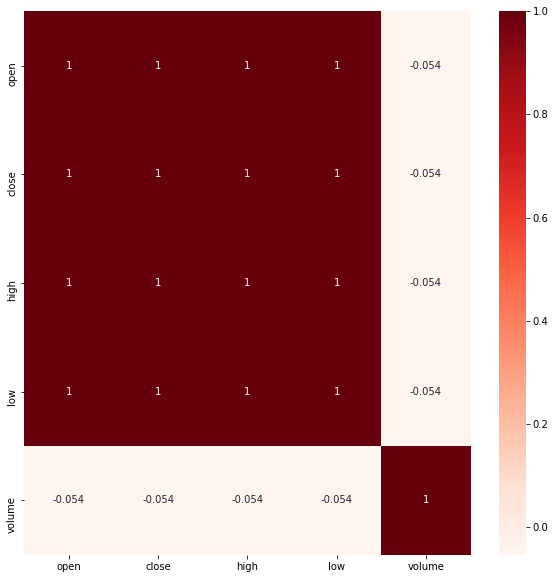

In [ ]:
#Estudiando correlaciones entre variables
correlations = df.loc[:,'open':'volume'].corr()
#Using Pearson Correlation
plt.figure(figsize=(10,10))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

**Resolvemos considerar la variable "close" para las visualizaciones, ya que el coeficiente 1 con las demás variables de precio nos indica que siguen la misma distribución y por el momento no aportaría información adicional considerarlas a todas.**

Corroboramos esta conclusión obteniendo las medidas descriptivas de todas las variables en el período de interés.

In [ ]:
#Definimos un nuevo dataset donde cada crypto activo representa una observacion y las variables son la media de cada variable original para ese crypto activo.
df_means =df.groupby(['cripto_activo']).agg({'open': ['mean'],'close': ['mean'], 'high': ['mean'],'low': ['mean'],'volume': ['mean']})
df_means.columns = ['_'.join(t) for t in df_means.columns]

df_means

open_mean  close_mean  high_mean  low_mean  volume_mean
cripto_activo                                                         
AAVEUSDT         249.990     250.079    253.364   246.369    11892.125
ADAUSDT            0.670       0.671      0.679     0.662 26545503.922
BCHUSDT          515.765     515.945    521.733   509.565    13263.774
BNBUSDT          188.907     189.010    191.001   186.640   163069.052
BTCUSDT        37518.520   37525.707  37776.375 37239.492     3414.171
COMPUSDT         325.125     325.237    329.172   320.989     2369.627
DASHUSDT         172.436     172.492    174.557   170.299    10089.497
DOTUSDT           20.721      20.728     20.958    20.469   582682.116
EOSUSDT            4.116       4.118      4.166     4.064  1531676.378
ETCUSDT           16.827      16.846     17.131    16.534   214567.922
ETHUSDT         1417.010    1417.653   1429.176  1403.571    47008.314
LINKUSDT          23.273      23.279     23.529    23.003   377177.972
LTCUSDT          160.083     160.132    161.894   158.172    70660.381
MKRUSDT         1810.261    1811.037   1834.179  1786.745      273.617
NEOUSDT           38.517      38.532     39.016    37.992    64951.975
XMRUSDT          205.802     205.849    207.744   203.734     6248.919

In [ ]:
#Obtenemos las medidas descriptivas de la distibucion de la media de cada variable
df_means.describe().round(2)

open_mean  close_mean  high_mean  low_mean  volume_mean
count     16.000      16.000     16.000    16.000       16.000
mean    2666.750    2667.330   2686.540  2645.520  1852803.110
std     9308.460    9310.230   9372.170  9239.470  6596211.290
min        0.670       0.670      0.680     0.660      273.620
25%       22.640      22.640     22.890    22.370     9129.350
50%      180.670     180.750    182.780   178.470    55980.140
75%      372.790     372.910    377.310   368.130   255220.430
max    37518.520   37525.710  37776.380 37239.490 26545503.920

## Medidas Descriptivas de las variables CLOSE y VOLUME para el periodo completo bajo estudio

In [ ]:
#Medidas descriptivas por crypto activo para la columna close
df_descr_cl=df.groupby(['cripto_activo']).close.describe()
df_descr_cl

count      mean       std  ...       50%       75%       max
cripto_activo                               ...                              
AAVEUSDT      5111.000   250.080   170.292  ...   290.327   396.601   617.350
ADAUSDT       5111.000     0.671     0.549  ...     0.366     1.190     2.420
BCHUSDT       5111.000   515.945   280.242  ...   467.790   580.125  1592.320
BNBUSDT       5111.000   189.010   204.464  ...    44.628   274.701   684.220
BTCUSDT       5111.000 37525.688 17046.441  ... 37321.750 54822.775 64577.262
COMPUSDT      5111.000   325.237   208.577  ...   267.610   469.020   904.340
DASHUSDT      5111.000   172.492    96.971  ...   121.010   241.080   463.090
DOTUSDT       5111.000    20.728    14.764  ...    17.377    35.506    49.279
EOSUSDT       5111.000     4.118     2.079  ...     3.179     4.770    14.516
ETCUSDT       5111.000    16.846    23.881  ...     7.774    14.036   157.147
ETHUSDT       5111.000  1417.652   904.696  ...  1358.280  1843.975  4332.810
LINKUSDT      5111.000    23.279    10.743  ...    23.377    30.821    52.269
LTCUSDT       5111.000   160.132    80.425  ...   153.140   207.635   409.840
MKRUSDT       5111.000  1811.039  1371.644  ...  1532.220  2343.410  6227.230
NEOUSDT       5111.000    38.532    28.901  ...    24.295    44.788   139.500
XMRUSDT       5111.000   205.849    95.524  ...   159.800   237.030   515.990

[16 rows x 8 columns]

In [ ]:
#Medidas descriptivas por crypto activo para la columna volume
df_descr_v=df.groupby(['cripto_activo']).volume.describe()
df_descr_v

count         mean  ...          75%           max
cripto_activo                        ...                           
AAVEUSDT      5111.000    11892.125  ...    14982.782    118056.674
ADAUSDT       5111.000 26545503.922  ... 32010895.350 447599616.700
BCHUSDT       5111.000    13263.774  ...    16065.620    145223.262
BNBUSDT       5111.000   163069.052  ...   186475.050   2002898.550
BTCUSDT       5111.000     3414.171  ...     4006.839     32057.769
COMPUSDT      5111.000     2369.627  ...     2881.483     38084.579
DASHUSDT      5111.000    10089.497  ...    11788.006    309717.598
DOTUSDT       5111.000   582682.116  ...   701758.495   7670053.890
EOSUSDT       5111.000  1531676.378  ...  1837239.495  40949063.440
ETCUSDT       5111.000   214567.922  ...   240867.190   5900847.065
ETHUSDT       5111.000    47008.314  ...    56339.148    384301.290
LINKUSDT      5111.000   377177.972  ...   458136.495   5639549.160
LTCUSDT       5111.000    70660.381  ...    89024.166    547581.011
MKRUSDT       5111.000      273.617  ...      297.877      8856.377
NEOUSDT       5111.000    64951.975  ...    76534.714   1238561.537
XMRUSDT       5111.000     6248.919  ...     7371.237     81714.989

[16 rows x 8 columns]

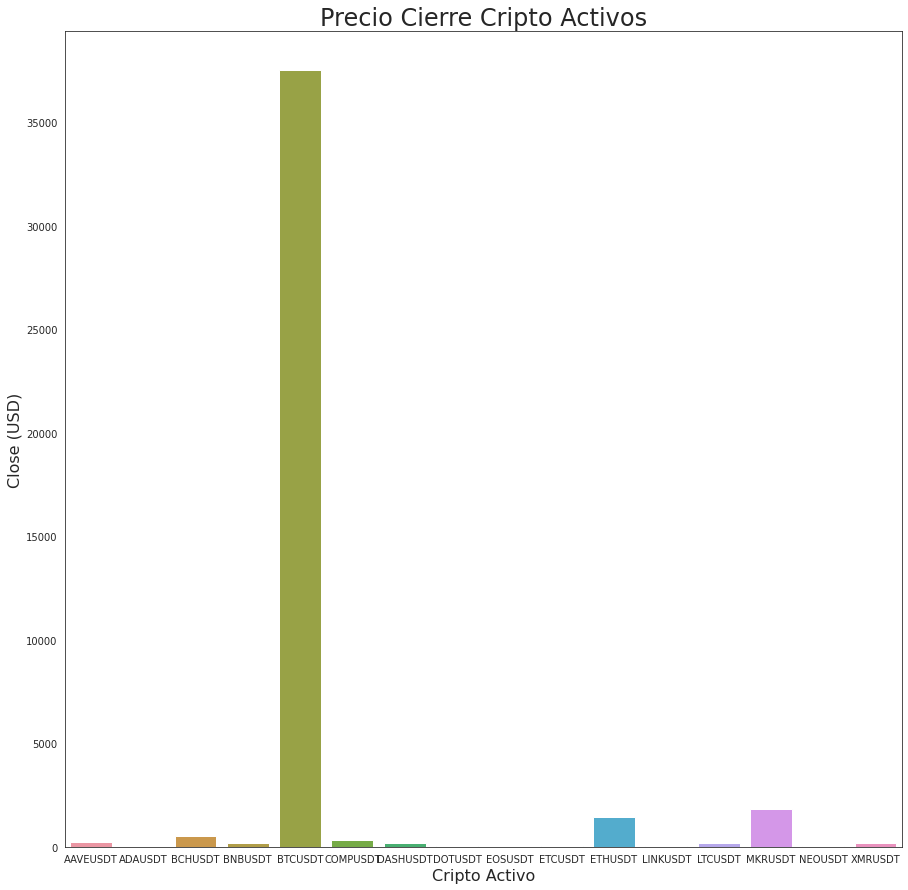

In [ ]:
seaborn.set_style("white")
plt.figure(figsize=(15, 15))

#gráfico 
bar2 = seaborn.barplot(data=df,x="cripto_activo",  y="close", ci=None)

plt.xlabel('Cripto Activo',fontdict= { 'fontsize': 16})
plt.ylabel('Close (USD)',fontdict= { 'fontsize': 16})
plt.title('Precio Cierre Cripto Activos',fontdict= { 'fontsize': 24}, y =1.0)
plt.show()

## **Diccionario CRIPTO ACTIVOS**
Para trabajar más comodamente se crea un diccionario que por cada llave (nombre de criptoactivo) tiene un dataframe con las observaciones correspondientes a cada cripto activo. (como alternativa se podria trabajar con un multiindex)

In [ ]:
#Lista de CriptoActivos
cripto_list = list(df['cripto_activo'].unique())

#CREO UN DICCIONARIO VACÍO
df_dict = {}
contador=0
#Recorro la lista con cripto activos
for i in cripto_list:
  df_aux = df[df.cripto_activo == i]
  df_dict[i] = df_aux
  #EL DICCIONARIO GUARDA POR CLAVE VALOR CADA CRIPTO ACTIVO UN DATAFRAME CON SUS OBSERVACIONES
  
  
  #Impresion de 3 llaves del diccionario Resultado para observar
  if contador<3:
    print(i, df_dict[i])
    contador+=1


AAVEUSDT                        open   close    high  ...  Month  Week   Weekday
2020-10-15 03:00:00  51.430  47.099  59.000  ...     10    42  Thursday
2020-10-15 04:00:00  47.097  47.486  47.916  ...     10    42  Thursday
2020-10-15 05:00:00  47.429  49.000  49.746  ...     10    42  Thursday
2020-10-15 06:00:00  49.000  49.031  49.496  ...     10    42  Thursday
2020-10-15 07:00:00  49.150  49.000  49.208  ...     10    42  Thursday
...                     ...     ...     ...  ...    ...   ...       ...
2021-05-16 11:00:00 559.210 547.340 560.560  ...      5    19    Sunday
2021-05-16 12:00:00 547.400 533.370 551.180  ...      5    19    Sunday
2021-05-16 13:00:00 533.120 536.660 537.990  ...      5    19    Sunday
2021-05-16 14:00:00 536.660 523.180 541.040  ...      5    19    Sunday
2021-05-16 15:00:00 523.180 519.160 524.200  ...      5    19    Sunday

[5111 rows x 10 columns]
ADAUSDT                      open  close  high   low  ...  Year Month  Week   Weekday
2020-10-15 03:0

## Histograma de activos

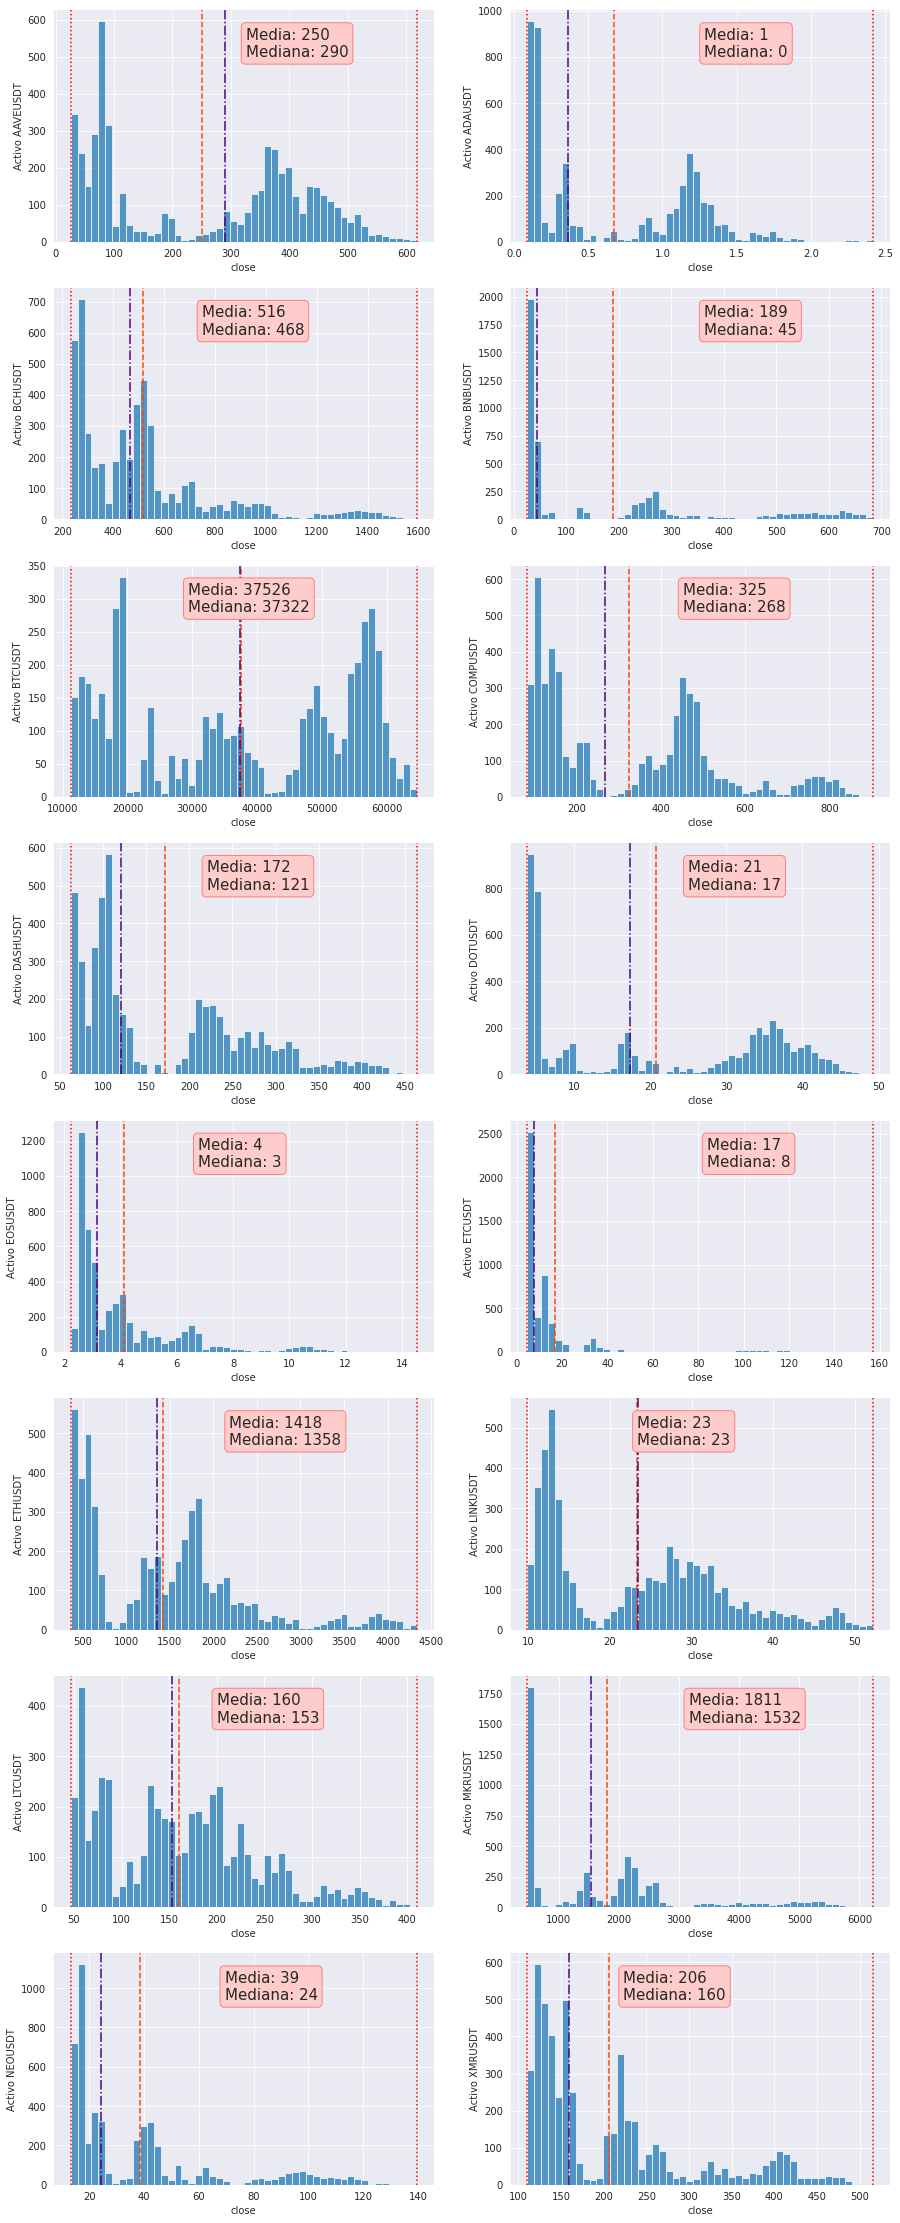

In [ ]:

seaborn.set_style("darkgrid")
#Se va a confeccionar un histograma de la variable Close de cada criptoactivo
variable='close'

#Se Crean subplots para graficar ordenadamente
filas=int(len(cripto_list)/2)
f,axs=plt.subplots(filas,2,figsize=(15,5*filas))

#Se recorre la Lista de Activos y se grafica cada histograma
for cripto in cripto_list:
  indice=cripto_list.index(cripto) #Lugar del Activo en la lista            
  serie=df_dict[cripto][variable]
  axe=axs[int(indice/2)][indice%2]  

  #Grafico histogramaa
  seaborn.histplot(serie,bins=50,ax=axe)

  #Obtención de Parametros a Graficar 
  media_item=df_descr_cl.loc[cripto,'mean']
  mediana_item=df_descr_cl.loc[cripto,'50%']
  min_item=df_descr_cl.loc[cripto,'min']
  max_item=df_descr_cl.loc[cripto,'max']

  ref='Media: '+ str(round(media_item)) + '\nMediana: '+ str(round(mediana_item))

  axe.axvline(media_item, color='orangered',linestyle='--', label='Media')
  axe.axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
  axe.axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
  axe.axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

  starty, endy= axe.get_ylim()
  startx, endx= axe.get_xlim()
  axe.text((endx-startx)*0.5,endy*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

  label= "Activo "+ cripto
  axe.set_ylabel(label)
seaborn.despine()

Observando las distribuciones de los criptoactivos se ve claramente que al ser serie temporales y variar en el tiempo, el tratamiento tiene que ser completamente distinto al que venimos acostumbrados, ya que se puede ver como cada distribucion es como una superposicion de distribuciones, se comportan como si fueran muchas poblaciones distintas superpuestas, ya que las distribuciones seguramente no se mantendran en el tiempo

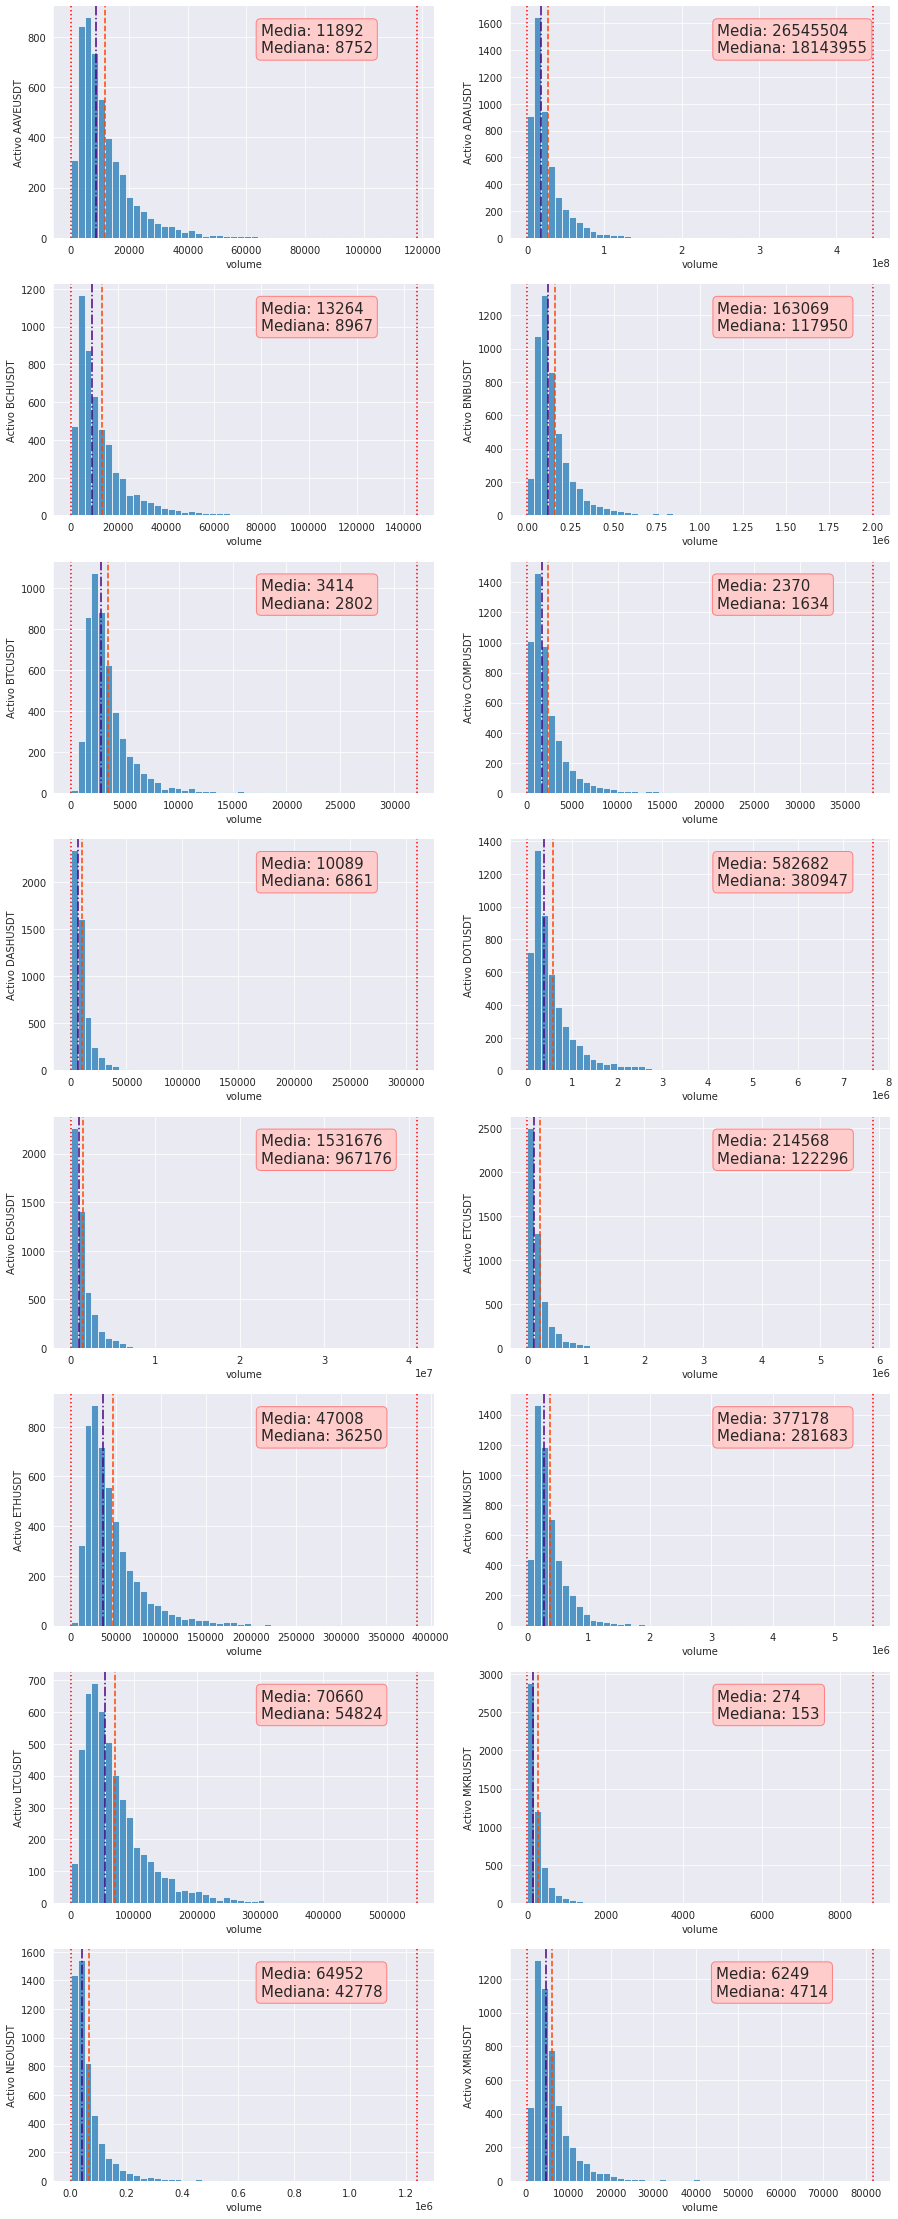

In [ ]:
#Se va a confeccionar un histograma de la variable Close de cada criptoactivo
variable='volume'

#Se Crean subplots para graficar ordenadamente
filas=int(len(cripto_list)/2)
f,axs=plt.subplots(filas,2,figsize=(15,5*filas))

#Se recorre la Lista de Activos y se grafica cada histograma
for cripto in cripto_list:
  indice=cripto_list.index(cripto) #Lugar del Activo en la lista            
  serie=df_dict[cripto][variable]
  axe=axs[int(indice/2)][indice%2]  

  #Grafico histogramaa
  seaborn.histplot(serie,bins=50,ax=axe)

  #Obtención de Parametros a Graficar 
  media_item=df_descr_v.loc[cripto,'mean']
  mediana_item=df_descr_v.loc[cripto,'50%']
  min_item=df_descr_v.loc[cripto,'min']
  max_item=df_descr_v.loc[cripto,'max']

  ref='Media: '+ str(round(media_item)) + '\nMediana: '+ str(round(mediana_item))

  axe.axvline(media_item, color='orangered',linestyle='--', label='Media')
  axe.axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
  axe.axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
  axe.axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

  starty, endy= axe.get_ylim()
  startx, endx= axe.get_xlim()
  axe.text((endx-startx)*0.5,endy*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

  label= "Activo "+ cripto
  axe.set_ylabel(label)

seaborn.despine()

La variable **'volume'**, tiene otro comportamiento distinto a la variable **'close'**, ya que pareciera tener una distribucion de Poisson con lambda pequeño

##**Diccionario de MEDIDAS DESCRIPTIVAS MÓVILES**

Obtendremos por cada crypto activo la media móvil, la desviación estándar móvil  y coeficiente de variación móvil del precio de cierre, y crearemos un segundo diccionario con estas medidas descriptivas.

In [ ]:
#CREO UN DICCIONARIO VACÍO
mobile_mean_std_dict = {}
contador=0

for i in cripto_list:
  #obtenemos el dataframe de cada moneda del diccionario nº1, en le cual la frecuencia de las observaciones es H.
  df_data= df_dict[i]
  
  # Creamos un dataframe para guardar las medidas de la moneda en estudio 
  df_aux = pd.DataFrame(columns=['mobile_mean', 'mobile_std', 'coef_va'])
  
  # calculamos las medidas para un periodo de 1 dia (rolling(24)
  df_mean=df_data.close.rolling(24).mean()
  df_std=df_data.close.rolling(24).std()
  df_coefv=np.divide(df_std,df_mean)
  #concatenacion vertical
  df_aux=pd.concat([df_mean, df_std,df_coefv], axis=1)
  
  #Aplicamos al dataframe auxiliar la frecuencia '6h' y quitamos las filas NaN que se generan para la hora inicial, 
  # en la cual el valor de las medidas móviles es NaN por que NO hay periodo anterior con el cual hacer el cálculo
  df_aux= df_aux.asfreq(freq='6h')
  df_aux= df_aux.dropna()
  #guardamos el dataframe con las medidas de la moneda en estudio en el 2º diccionario
  mobile_mean_std_dict[i] = df_aux

  mobile_mean_std_dict[i].columns=['mobile_mean', 'mobile_std', 'coef_va']

#EL DICCIONARIO GUARDA POR CLAVE VALOR LA MEDIA MOVIL DE CADA CRIPTO
  if contador<3:
    print(i, mobile_mean_std_dict[i])
    contador+=1

AAVEUSDT                      mobile_mean  mobile_std  coef_va
2020-10-16 03:00:00       46.295       1.891    0.041
2020-10-16 09:00:00       44.703       2.213    0.050
2020-10-16 15:00:00       43.492       2.159    0.050
2020-10-16 21:00:00       42.005       1.281    0.031
2020-10-17 03:00:00       41.030       1.012    0.025
...                          ...         ...      ...
2021-05-15 15:00:00      579.132      16.702    0.029
2021-05-15 21:00:00      563.705      21.594    0.038
2021-05-16 03:00:00      549.598      18.991    0.035
2021-05-16 09:00:00      543.078      14.511    0.027
2021-05-16 15:00:00      536.673      11.148    0.021

[848 rows x 3 columns]
ADAUSDT                      mobile_mean  mobile_std  coef_va
2020-10-16 03:00:00        0.107       0.001    0.005
2020-10-16 09:00:00        0.106       0.001    0.012
2020-10-16 15:00:00        0.105       0.002    0.015
2020-10-16 21:00:00        0.104       0.001    0.013
2020-10-17 03:00:00        0.104       0.

#**4) Análisis OUTLIERS y ESTACIONALIDAD de Bloxpots en diferentes períodos para un activo determinado.**

Elegimos para nuestro estudio el activo "**BTCUSDT**", por lo definimos  un nuevo dataframe "df_bloxplot" con esa moneda del diccionario.

In [ ]:
df_bloxplot=df_dict['BTCUSDT']
df_bloxplot[:3]

open     close      high  ...  Month  Week   Weekday
2020-10-15 03:00:00 11361.580 11378.960 11380.210  ...     10    42  Thursday
2020-10-15 04:00:00 11378.960 11388.730 11403.140  ...     10    42  Thursday
2020-10-15 05:00:00 11388.730 11403.950 11412.650  ...     10    42  Thursday

[3 rows x 10 columns]

### **4.1 BTCUSDT Boxplot Distribución por Mes**

Text(0.5, 0, 'Meses')

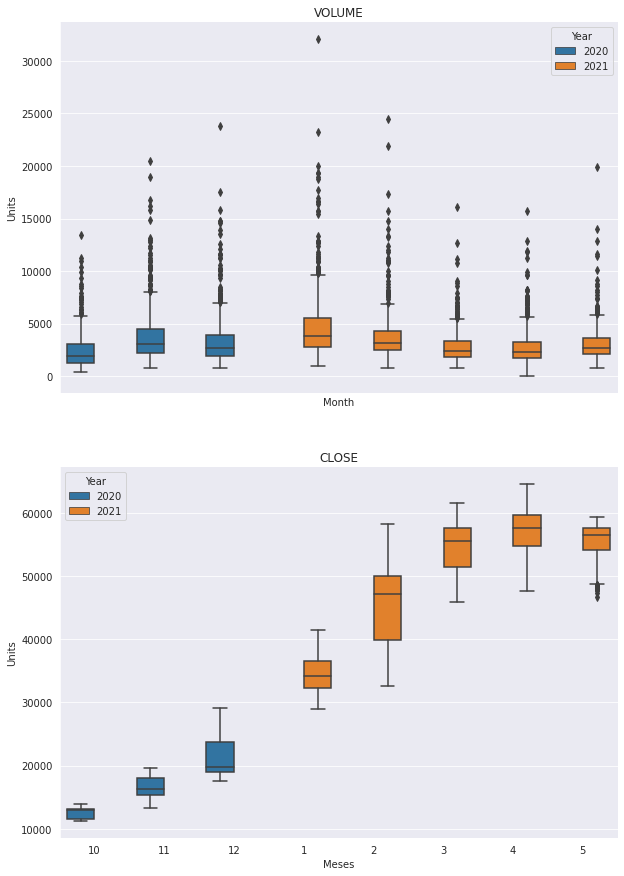

In [ ]:
orden_months=[10,11,12,1,2,3,4,5]

fig, ejes = plt.subplots(2, 1, figsize=(10, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Month',hue='Year',y=name,ax=eje, order= orden_months)

    if (eje != ejes[-1] and name!='volume'):
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    

seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Meses')


Podemos observar que la distribución mensual de las variables relativas a precio del cripto activo (open, close, high y low) se mantienen en constante crecimiento, siguiendo todas ellas una curva similar. No se observan valores outliers exceptuando el mes de Mayo del presente año. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Febrero de 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos altas y bajas pero la mediana nunca supera las 5 mil unidades. La caja con mayor variacion entre sus percentiles (la más alta) es la del mes de Enero de 2021. Observamos también que existen muchos valores outliers.

### **4.2 BTCUSDT Boxplot Distribución por Semana**

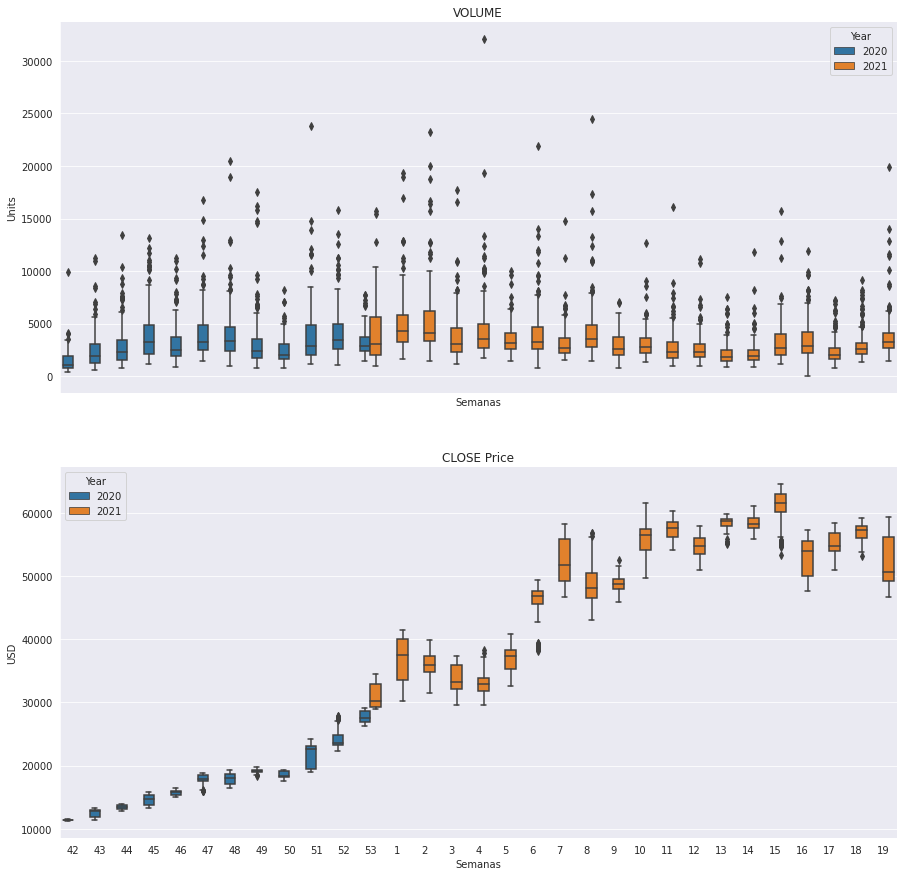

In [ ]:
orden_weeks=[42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

fig, ejes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
for name, eje in zip(['volume','close'], ejes):
    seaborn.boxplot(data=df_bloxplot, x='Week',hue='Year',y=name,ax=eje, order= orden_weeks)
    eje.set_xlabel('Semanas')
    if name!='volume':
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())   
    

seaborn.set_style("darkgrid")
seaborn.despine()


Nuevamente, con el periodo semanal, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low), no se mantienen en el tiempo y se muestran en constante crecimiento, siguiendo todas ellas una curva similar. 
En este caso podemos observar varias semanas con outliers, destacándose los outliers con tendencia bajista en las semanas 7 y 15. 
Las cajas con mayor variacion entre sus percentiles (la más altas) son en las semanas 2,8,17 y 20 del presente año 2021.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos nuevamente que existen muchos valores outliers y que las semanas cuya mediana estuvo más cercana a las 5000 unidades fueron la primer y segunda semana del 2021.

###**4.3 BTCUSDT Boxplot Distribución por día de la semana**

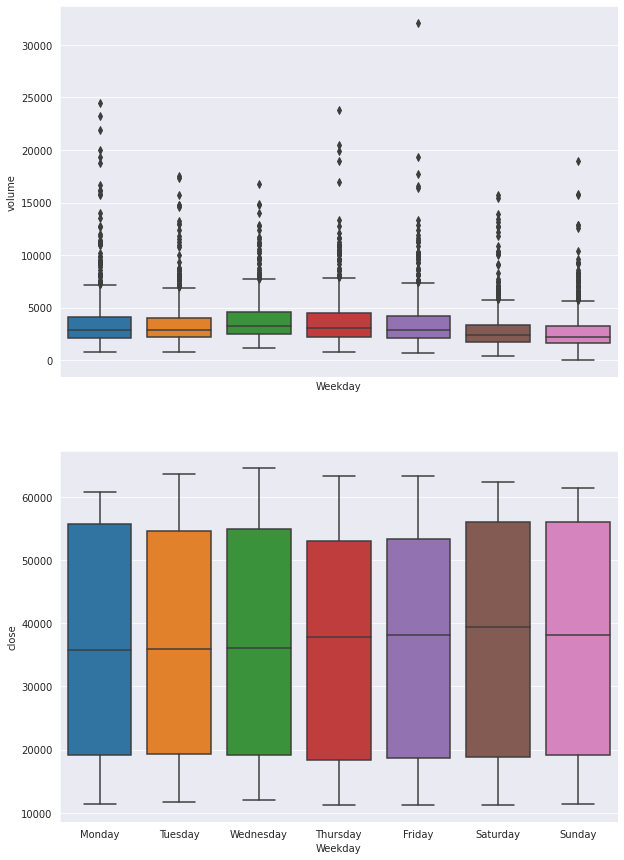

In [ ]:
periodo='Weekday'
variables=['volume','close']
orden=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 15), sharex=True)
for variable, ax in zip(variables, axes):
  seaborn.boxplot(data=df_bloxplot, x=periodo, y=variable, ax=ax, order=orden
                  )
  ax.set_ylabel(variable)

Desde la perspectiva de los días de semana, podemos observar que la distribución de las variables relativas a precio del cripto activo (open, close, high y low) muestra un patrón de crecimiento del lunes al miercoles, cuando alcanza su pico del valor máximo, y luego decrece hacia el domingo. No se observan outliers, pero se observa una gran dispersión.

Respecto a la distribución del la variable relativa al volumen transaccionado del cripto activo en estudio, observamos que presenta una mayor variación a mitad de semana, los días miercoles y jueves se presentan los mayores volumenes transaccionados (sus cajas son mas altas y sus máximos se aproximan más a las 10000 unidades). Por otro lado, los días con menor variación son los Sábados y Domingos (sus cajas son más angostas y tanto sus máximos como mínimos son menores en comparación a los demas días de la semana).



En general, se ve que las distribuciones de las variables referidas a **precios** no se mantienen constantes en el tiempo, en la variable **volume** se nota tal vez una leve estacionalidad por mes, semana y dia de la semana, pero no muy marcada, haciendo que la distribución sea bastante constante en el tiempo. Se nota la prescencia de outliers en la variable **'volume'**, se deberia decidir que trato darles, tal vez al hacer luego un analisis de media movil y desvio movil estos outliers pasen desapercividos.

#5) Análisis de la evolución temporal de los activos.

Vamos a graficar el porcentaje de variación del precio de cierre del activo respecto al primer dia del periodo de interes, para poder observar la evolucion temporal de todos los activos en el mismo grafico

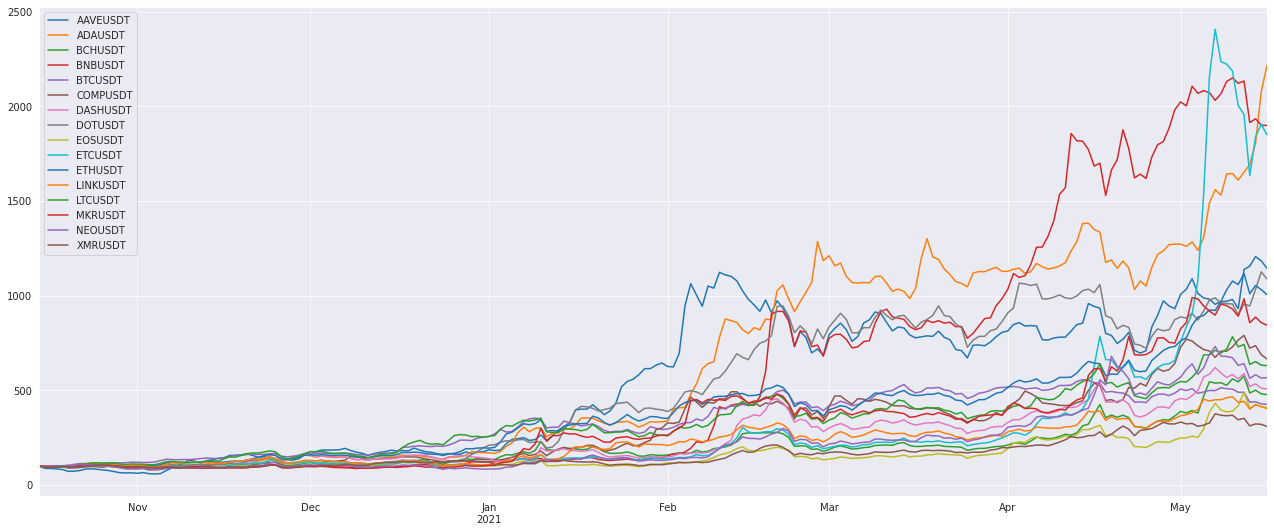

In [ ]:
# Porcentaje de variacion diario respecto al comienzo del periodo
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)

for cripto in criptoactivos:
  close_aux= df_dict[cripto]['close']

  close_normalizado=close_aux.div(close_aux.iloc[0]).mul(100)
 
  close_normalizado=close_normalizado.resample('D').mean()
  close_normalizado.plot()
  
plt.legend(criptoactivos)
plt.show()

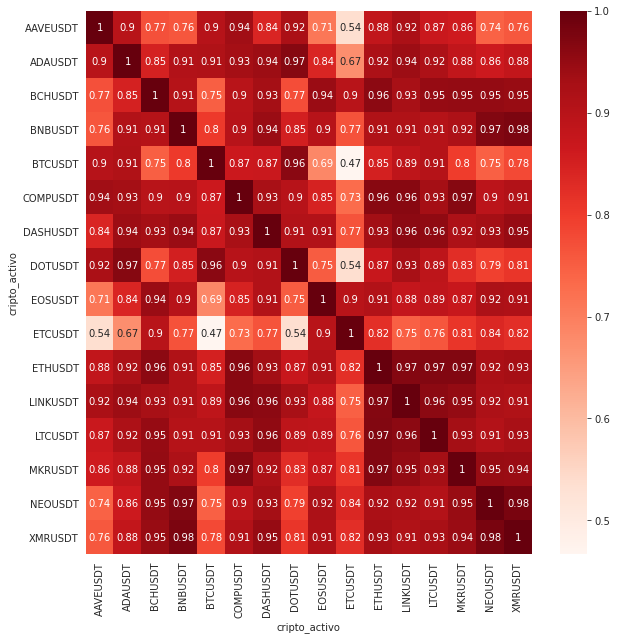

In [ ]:
#Estudiando correlaciones entre criptos para la variable close
corre = df_close.corr()
#Using Pearson Correlation
plt.figure(figsize=(10,10))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Data Frame con variable Close
df_close= df.pivot(columns='cripto_activo',
 values='close')
#Data Frame con variable Volume
df_volume= df.pivot(columns='cripto_activo',
 values='volume')

 ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? ¿Los activos tienden a moverse en forma conjunta? En caso de que existan crisis, ¿son globales o individuales?

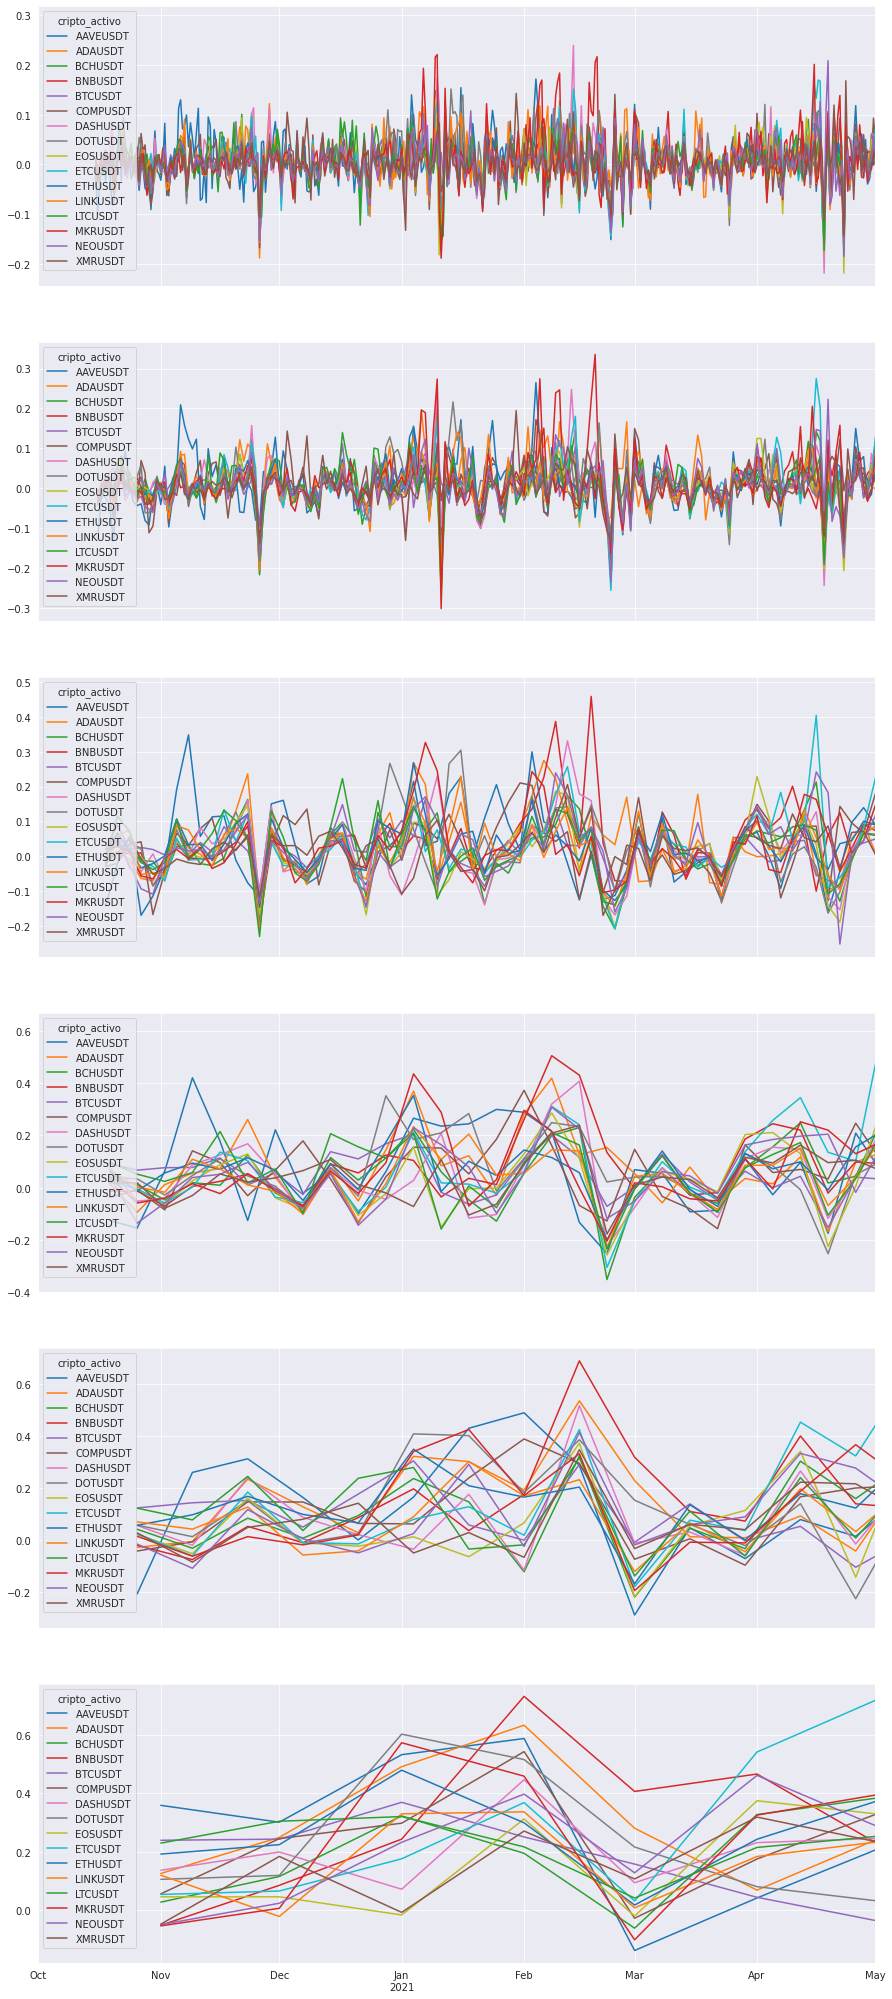

In [ ]:

periodo=['12h','D','3D','W','2W','M']
fig, axes = plt.subplots(len(periodo), 1, figsize=(15, 6*len(periodo)), sharex=True)
for i in periodo:
  indice=periodo.index(i)
  df_peri=df_close.resample(i).mean()
  df_crisis= (df_peri-df_peri.shift(1))/df_peri
  df_crisis.plot(ax=axes[indice])

Graficando para cada activo la diferencia de precio con respecto a un periodo anterior (estudiando para 4 casos 12h, Dia, Semana, Mes) Se observa una tendencia a moverse en forma conjunta con algunos despegues de algunos. Se observa respecto al precio de los activos, periodos de crisis tanto globales como individuales.
Se destacan haciendo el analisis diario 5 periodos de crisis muy marcados.

En el analisis mensual se observa una crisis globa muy marcada en el periodo Febrero-Marzo.
En Diciembre-Enero se ve uno un poco más individual para unos 3 activos

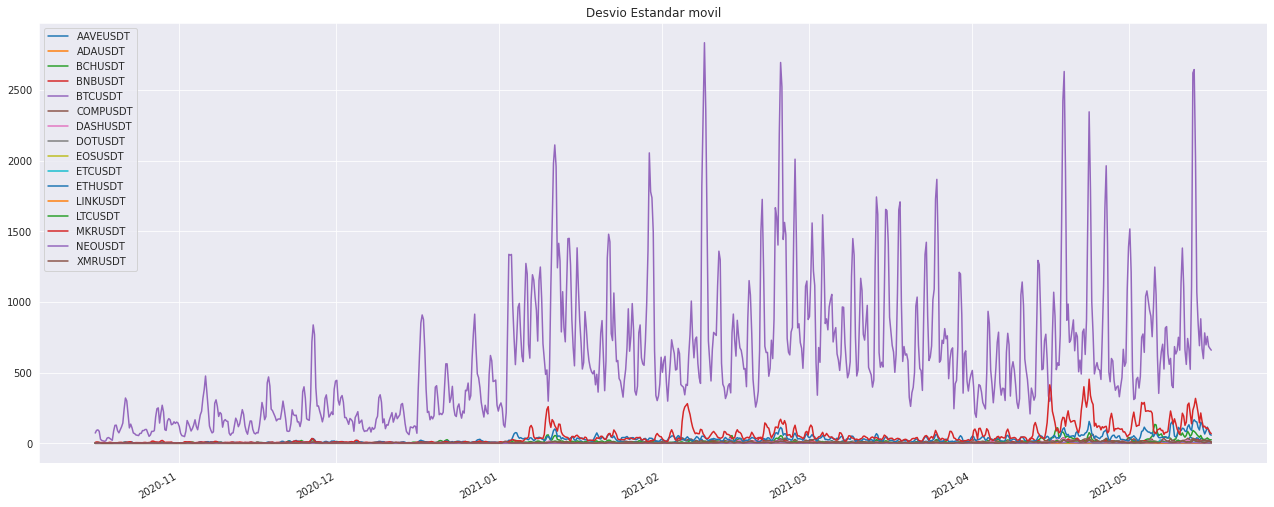

In [ ]:
##Desvio Estandar Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(22, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['mobile_std'].plot()
plt.title('Desvio Estandar movil')
plt.legend(criptoactivos)
plt.show()

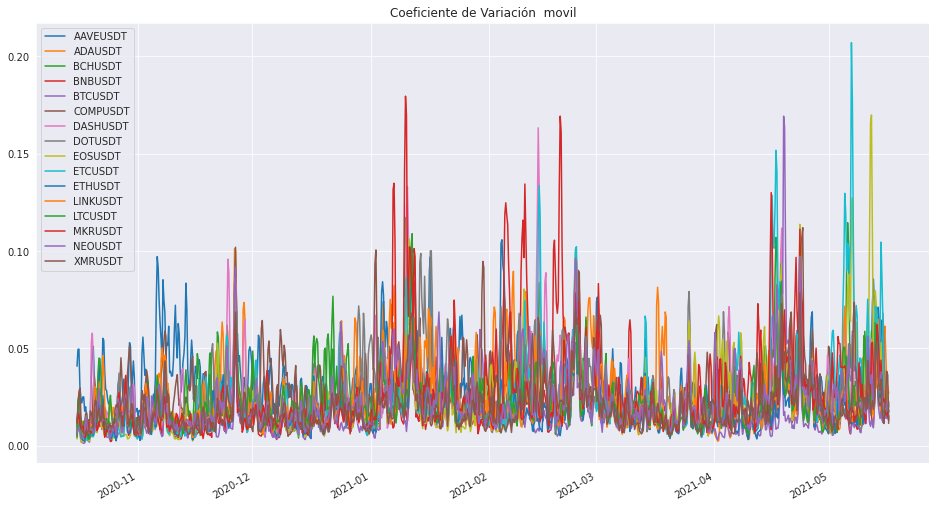

In [ ]:
# Coeficiente de Variacion Movil 6 periodos
fig, axes = plt.subplots(1, 1, figsize=(16, 9), sharex=True)
for cripto in criptoactivos:
  mobile_mean_std_dict[cripto]['coef_va'].plot()
plt.legend(criptoactivos)
plt.title('Coeficiente de Variación  movil')
plt.show()

# PARTE II - RESPUESTAS

##1) Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


In [ ]:
#Diccionario con cambios porcentuales respecto al valor anterior (Tasa de rendimiento simple)
df_tasasimple=df_close.pct_change()
df_tasasimple.head(3)

cripto_activo        AAVEUSDT  ADAUSDT  BCHUSDT  ...  MKRUSDT  NEOUSDT  XMRUSDT
2020-10-15 03:00:00       nan      nan      nan  ...      nan      nan      nan
2020-10-15 04:00:00     0.008    0.007    0.003  ...    0.007    0.004    0.003
2020-10-15 05:00:00     0.032    0.005    0.019  ...    0.009    0.003    0.003

[3 rows x 16 columns]

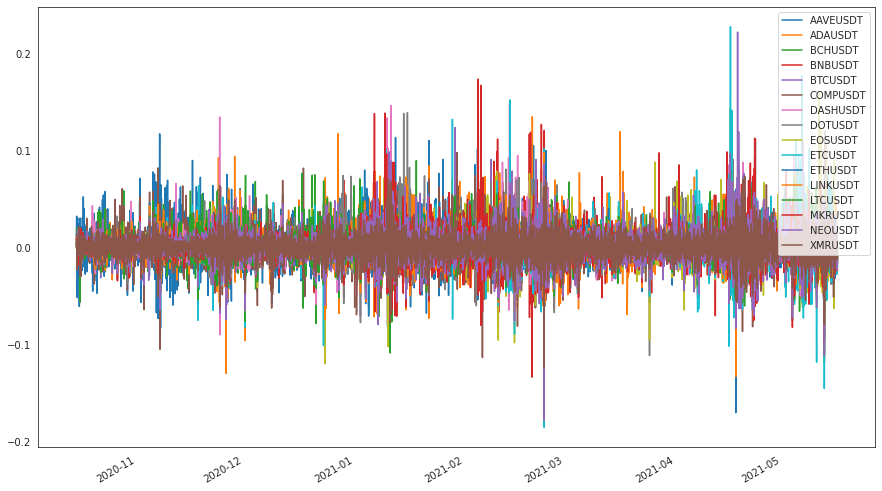

In [ ]:
#Evolucion temporal de la tasa de rendimiento simple

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasasimple.plot(ax=axes)

In [ ]:
#calculando el retorno logarítmico
# df['pct_change_close'] = df.close.pct_change()
# df['log_ret'] = np.log(df.close) - np.log(df.close.shift(1))
df_tasalog= np.log(df_close/df_close.shift(1))
df_tasalog.head(3)

cripto_activo        AAVEUSDT  ADAUSDT  BCHUSDT  ...  MKRUSDT  NEOUSDT  XMRUSDT
2020-10-15 03:00:00       nan      nan      nan  ...      nan      nan      nan
2020-10-15 04:00:00     0.008    0.007    0.003  ...    0.007    0.004    0.003
2020-10-15 05:00:00     0.031    0.005    0.019  ...    0.009    0.003    0.003

[3 rows x 16 columns]

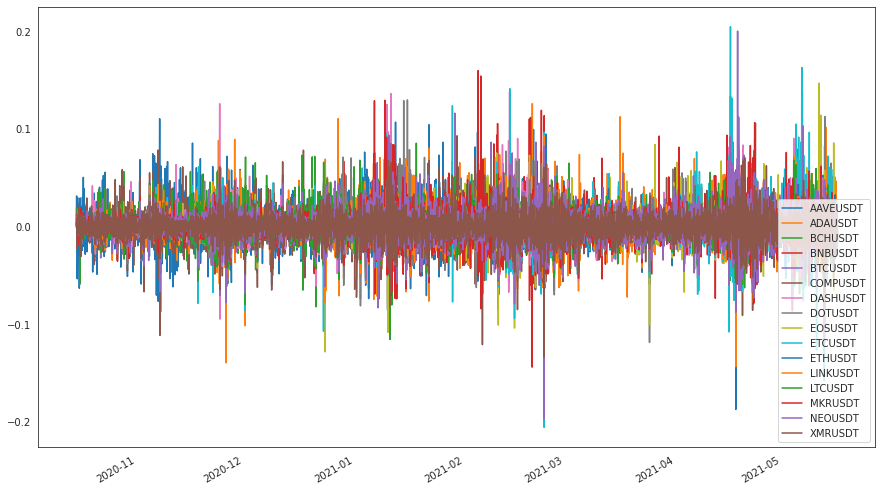

In [ ]:
#Evolucion temporal de la tasa de rendimiento logaritmica

fig, axes = plt.subplots(1, 1, figsize=(15, 9), sharex=True)
df_tasalog.plot(ax=axes)

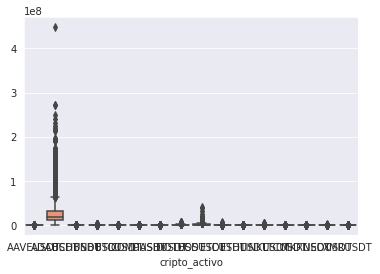

In [ ]:
orden_months=[10,11,12,1,2,3,4,5]
seaborn.boxplot(data=df_tasalog, x='Month',hue='Year',y=name,ax=eje, order= orden_months)

    if (eje != ejes[-1] and name!='volume'):
       eje.set_xlabel('')
       eje.set_ylabel('USD')
       eje.set_title(name.upper()+ ' Price')
    else:
       eje.set_ylabel('Units')
       eje.set_title(name.upper())    

seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Meses')

##2)Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series.



In [ ]:
df_tasalog.describe()

AAVEUSDT      ADAUSDT  ...      NEOUSDT      XMRUSDT
count  5110.000000  5110.000000  ...  5110.000000  5110.000000
mean      0.000470     0.000603  ...     0.000338     0.000219
std       0.019341     0.016190  ...     0.016299     0.012658
min      -0.187208    -0.139529  ...    -0.196604    -0.133440
25%      -0.009760    -0.006953  ...    -0.007075    -0.005968
50%       0.000261     0.000200  ...     0.000332     0.000360
75%       0.010395     0.007394  ...     0.007861     0.006729
max       0.110406     0.126017  ...     0.200202     0.070583

[8 rows x 16 columns]

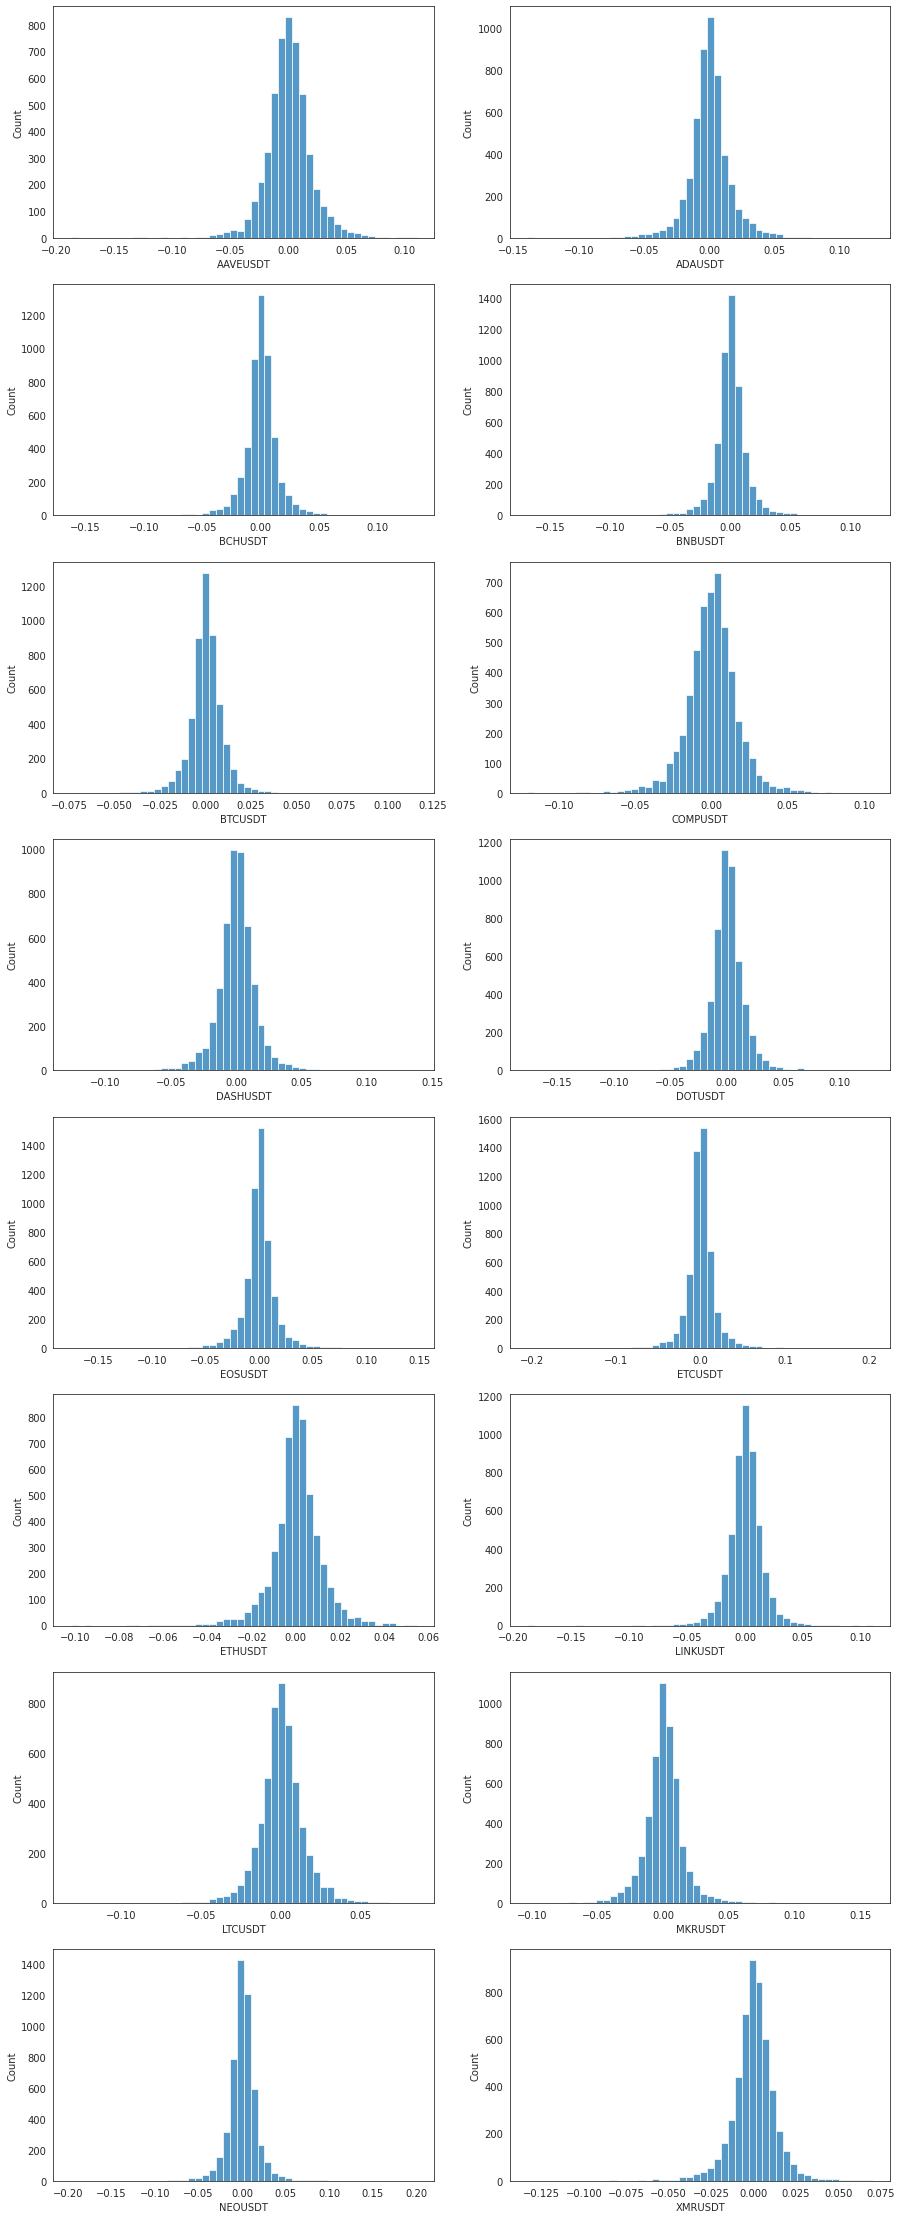

In [ ]:
f,axs=plt.subplots(int(len(cripto_list)/2),2,figsize=(15,2.5*len(cripto_list)))

for cripto in cripto_list:
  indice=cripto_list.index(cripto)
  seaborn.histplot(df_tasalog[cripto],bins=50,ax=axs[int(indice/2)][indice%2])


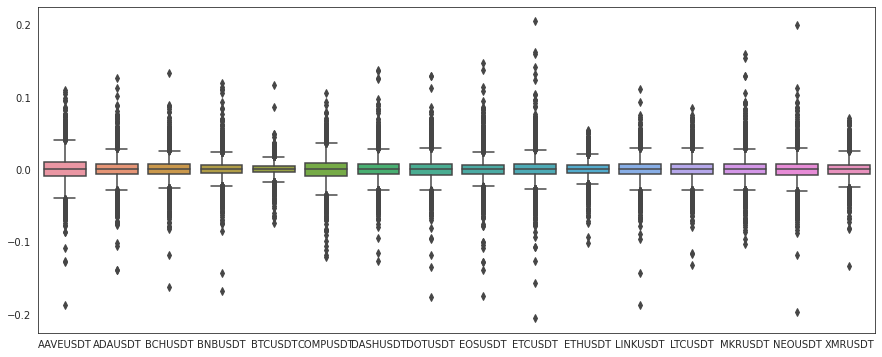

In [ ]:
f,axs=plt.subplots(1,1,figsize=(15,6))
seaborn.boxplot(data=df_tasalog)

Se observa que las distribuciones tienen una apariencia normal, centrada en 0 y con poca desviación  

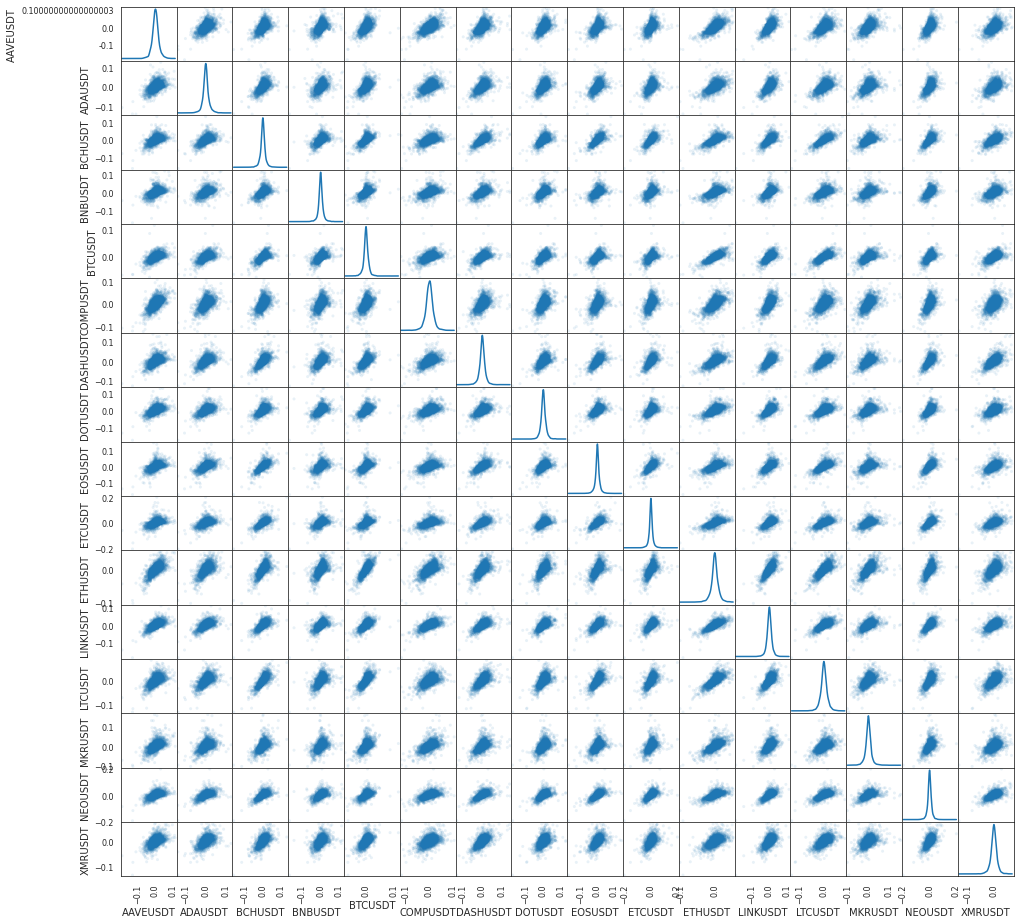

In [ ]:
 pd.plotting.scatter_matrix(df_tasalog, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

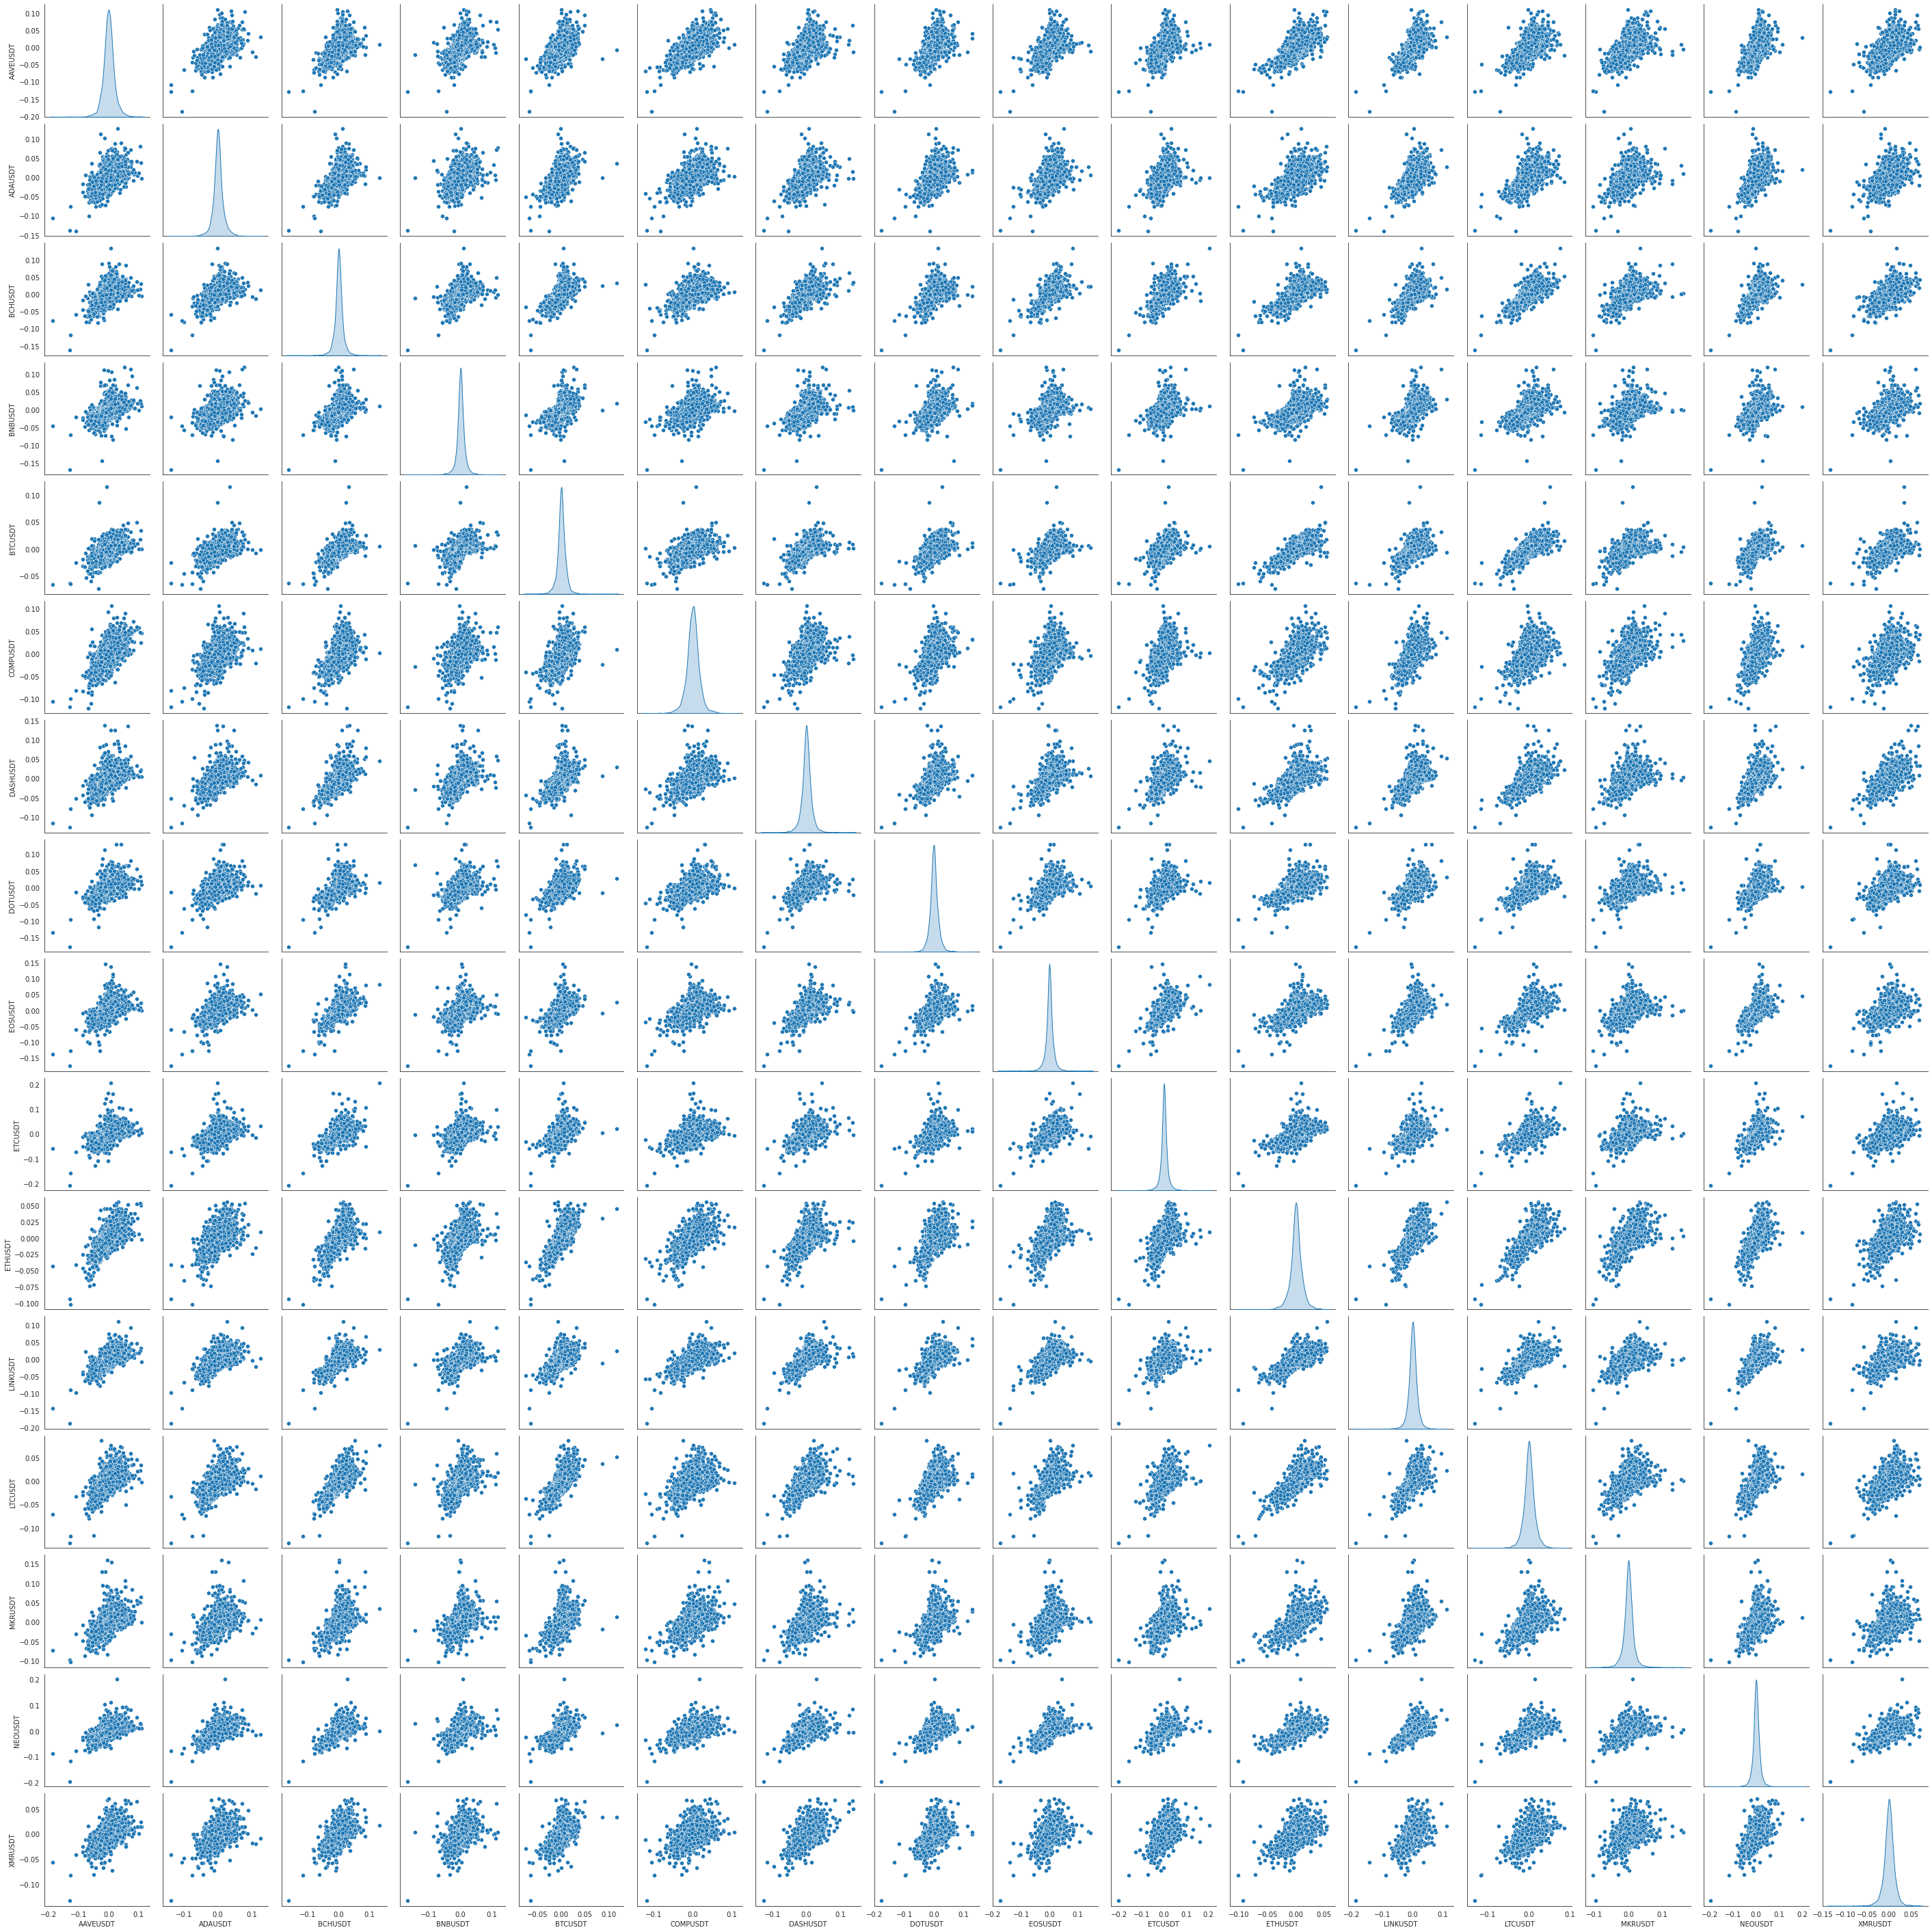

In [ ]:
seaborn.pairplot(df_tasalog, diag_kind="kde")

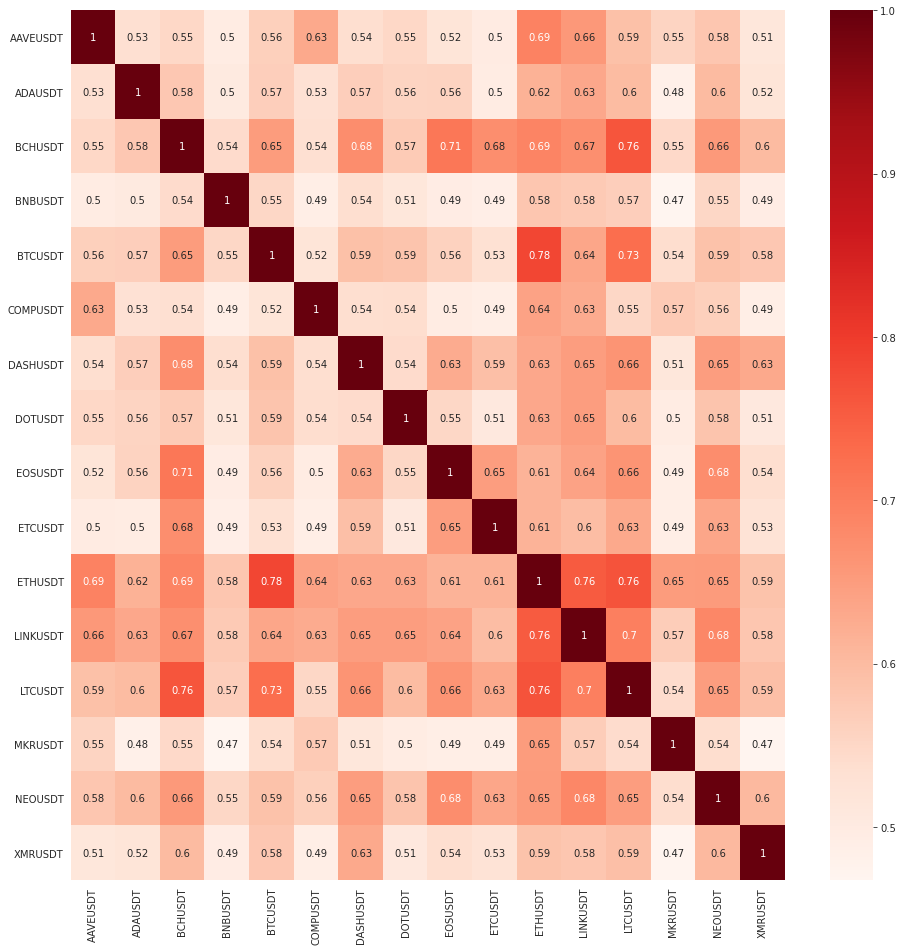

In [ ]:
#Estudiando correlaciones entre criptos para la variable tasalog
corre = df_tasalog.corr()
#Using Pearson Correlation
plt.figure(figsize=(16,16))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

##3) Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

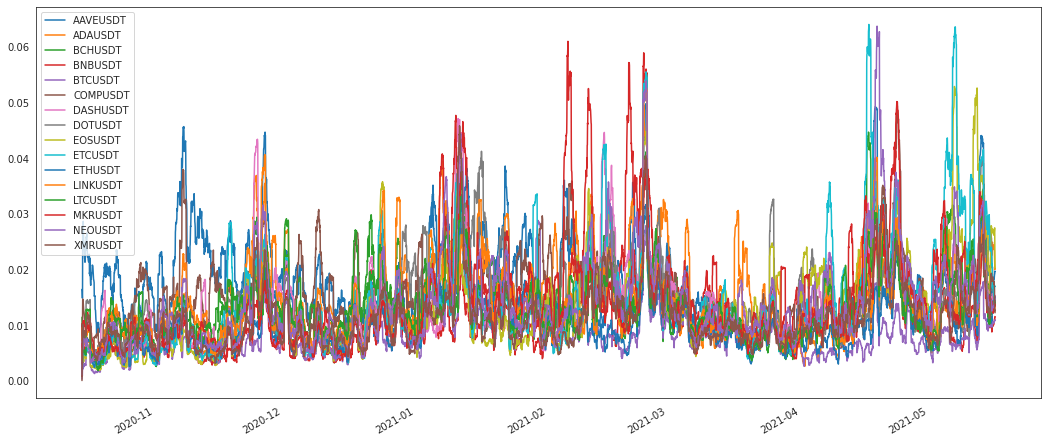

In [ ]:

volatilidad = df_tasalog.rolling('D').std()
volatilidad.plot(figsize=(18, 8));

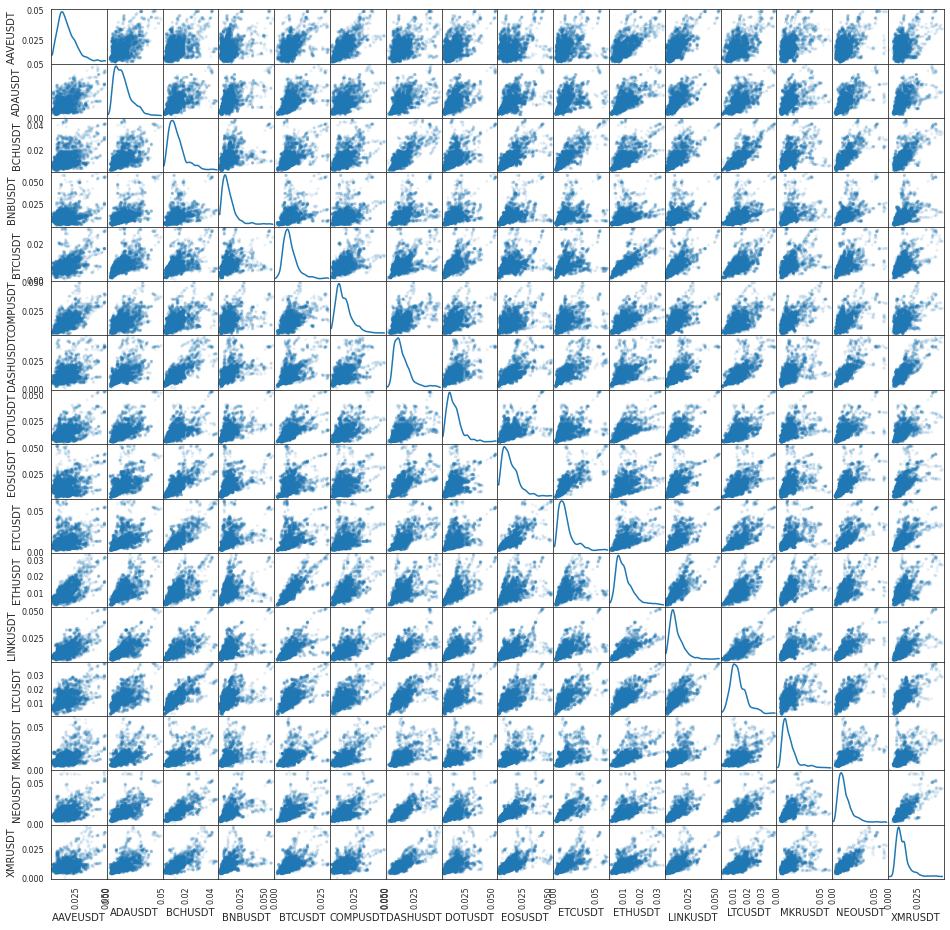

In [ ]:
 pd.plotting.scatter_matrix(volatilidad, diagonal='kde', alpha=0.1, figsize=(16,16))
 print('')

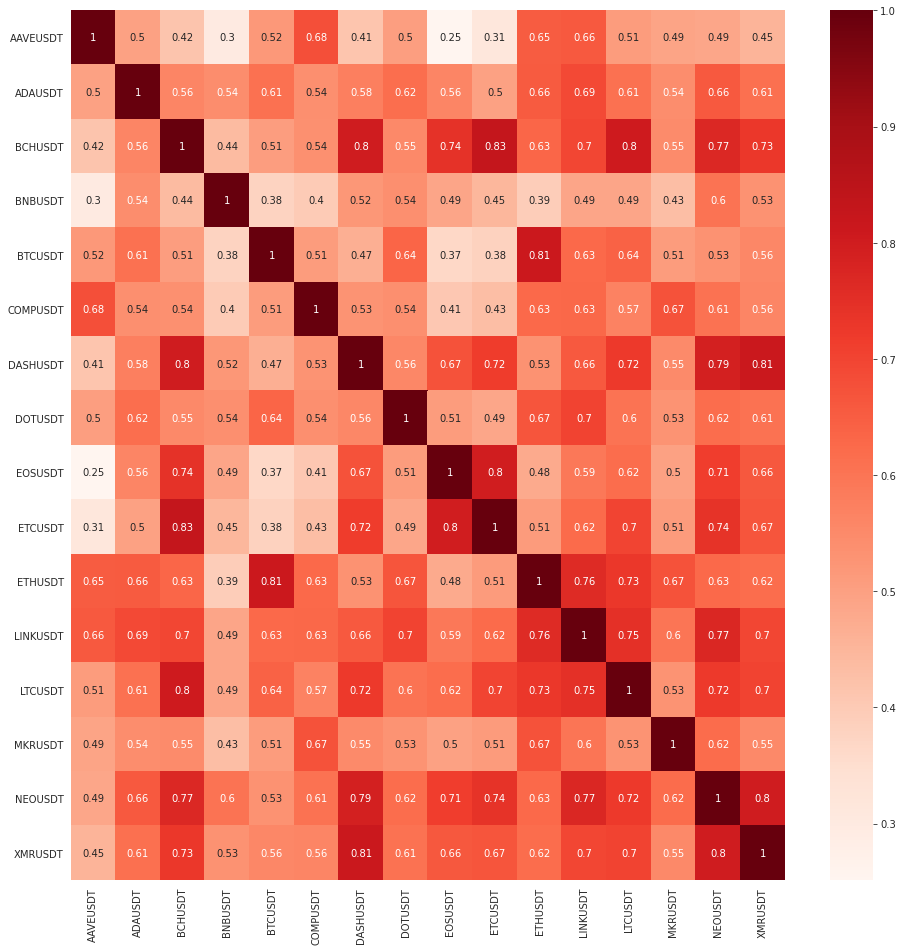

In [ ]:
#Estudiando correlaciones entre criptos para la volatilidad
corre = volatilidad.corr()
#Using Pearson Correlation
plt.figure(figsize=(16,16))

seaborn.heatmap(corre, annot=True, cmap=plt.cm.Reds)
plt.show()

Se observa en general una correlacion directa entre los cripto activos, pero entre algunos es mucho más marcada que entre otros

In [ ]:
print (corre.max())

          AAVEUSDT   ADAUSDT   BCHUSDT  ...   MKRUSDT   NEOUSDT   XMRUSDT
AAVEUSDT  1.000000  0.534759  0.548721  ...  0.554884  0.580715  0.513873
ADAUSDT   0.534759  1.000000  0.577751  ...  0.482689  0.600872  0.520718
BCHUSDT   0.548721  0.577751  1.000000  ...  0.547806  0.655749  0.600992
BNBUSDT   0.497233  0.502761  0.543979  ...  0.467373  0.550950  0.494826
BTCUSDT   0.563821  0.565410  0.652523  ...  0.539342  0.588442  0.578589
COMPUSDT  0.630278  0.530746  0.535542  ...  0.574188  0.564578  0.490821
DASHUSDT  0.537042  0.565864  0.676321  ...  0.514960  0.649370  0.630340
DOTUSDT   0.550324  0.556804  0.572199  ...  0.496621  0.584312  0.508292
EOSUSDT   0.521255  0.558379  0.711902  ...  0.491827  0.676928  0.537085
ETCUSDT   0.499708  0.496913  0.675180  ...  0.490658  0.634284  0.526451
ETHUSDT   0.693516  0.616085  0.690957  ...  0.651716  0.652881  0.587135
LINKUSDT  0.657897  0.632852  0.672293  ...  0.567252  0.684310  0.580701
LTCUSDT   0.591737  0.600273  0.763756